# House Price Prediction Project


Problem Statement:


Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company. A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below. The company is looking at prospective properties to buy houses to enter the market. You are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not. For this company wants to know: • Which variables are important to predict the price of variable? • How do these variables describe the price of the house?



Business Goal:


You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

In [1]:
#IMPORTING THE LIBRARIES NEEDED

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from  sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, power_transform
from sklearn.svm import SVR



from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#READ THE DATASET
df_train=pd.read_csv('train.csv')

In [4]:
df_train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1163         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1164         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1165         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1166         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1167         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2007        WD         Normal     128000  
1        10   2007        WD         Normal     268000  
2         6   2007        WD         Normal     269790  
3         1   2010       COD         Normal     190000  
4         6   2009        WD         Normal     215000  
...     ...    ...       ...            ...        ...  
1163      2   2010        WD         Normal     122000  
1164      5   2009        WD         Normal     108000  
1165      7   2009        WD         Normal     148500  
1166      7   2008        WD         Normal      40000  
1167      6   2006        WD         Normal     183200  

[1168 rows x 81 columns]

Showing all the features in the train dataset:

In [5]:
df_train.iloc[:5,:15]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  
0         Lvl    AllPub    Inside       Gtl      NPkVill       Norm       Norm  
1         Lvl    AllPub    Inside       Mod        NAmes       Norm       Norm  
2         Lvl    AllPub   CulDSac       Gtl      NoRidge       Norm       Norm  
3         Lvl    AllPub    Inside       Gtl       NWAmes       Norm       Norm  
4         Lvl    AllPub       FR2       Gtl       NWAmes       Norm       Norm

In [6]:
df_train.iloc[:5,15:30]

BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0   TwnhsE     1Story            6            5       1976          1976   
1     1Fam     1Story            8            6       1970          1970   
2     1Fam     2Story            7            5       1996          1997   
3     1Fam     1Story            6            6       1977          1977   
4     1Fam     1Story            6            7       1977          2000   

  RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
0     Gable  CompShg     Plywood     Plywood       None         0.0        TA   
1      Flat  Tar&Grv     Wd Sdng     Wd Sdng       None         0.0        Gd   
2     Gable  CompShg     MetalSd     MetalSd       None         0.0        Gd   
3       Hip  CompShg     Plywood     Plywood    BrkFace       480.0        TA   
4     Gable  CompShg     CemntBd     CmentBd      Stone       126.0        Gd   

  ExterCond Foundation  
0        TA     CBlock  
1        Gd      PConc  
2        TA      PConc  
3        TA     CBlock  
4        TA     CBlock

In [7]:
df_train.iloc[:5,45:60]

LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0        958             0             0         2         0   
1             0       2217             1             0         2         0   
2             0       2013             1             0         2         1   
3             0       1844             0             0         2         0   
4             0       1602             0             1         2         0   

   BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
0             2             1          TA             5        Typ   
1             4             1          Gd             8        Typ   
2             3             1          TA             8        Typ   
3             3             1          TA             7        Typ   
4             3             1          Gd             8        Typ   

   Fireplaces FireplaceQu GarageType  GarageYrBlt  
0           1          TA     Attchd       1977.0  
1           1          TA     Attchd       1970.0  
2           1          TA     Attchd       1997.0  
3           1          TA     Attchd       1977.0  
4           1          TA     Attchd       1977.0

In [8]:
df_train.iloc[:5,75:]

MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0        0       2    2007       WD        Normal     128000
1        0      10    2007       WD        Normal     268000
2        0       6    2007       WD        Normal     269790
3        0       1    2010      COD        Normal     190000
4        0       6    2009       WD        Normal     215000

Checking uniqueness in the features:

In [9]:
df_train.nunique()

Id               1168
MSSubClass         15
MSZoning            5
LotFrontage       106
LotArea           892
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         581
Length: 81, dtype: int64

In [10]:
df_train.shape

(1168, 81)

There are 1168 rows and 81 columns in the training dataset.

In [11]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Found out all the column names of the train dataset.

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

we can see that the train dataset contains both object type and integer type data.

In [13]:
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [14]:
# Statistical summary:
df_train.describe().T

count           mean           std      min        25%  \
Id             1168.0     724.136130    416.159877      1.0     360.50   
MSSubClass     1168.0      56.767979     41.940650     20.0      20.00   
LotFrontage     954.0      70.988470     24.828750     21.0      60.00   
LotArea        1168.0   10484.749144   8957.442311   1300.0    7621.50   
OverallQual    1168.0       6.104452      1.390153      1.0       5.00   
OverallCond    1168.0       5.595890      1.124343      1.0       5.00   
YearBuilt      1168.0    1970.930651     30.145255   1875.0    1954.00   
YearRemodAdd   1168.0    1984.758562     20.785185   1950.0    1966.00   
MasVnrArea     1161.0     102.310078    182.595606      0.0       0.00   
BsmtFinSF1     1168.0     444.726027    462.664785      0.0       0.00   
BsmtFinSF2     1168.0      46.647260    163.520016      0.0       0.00   
BsmtUnfSF      1168.0     569.721747    449.375525      0.0     216.00   
TotalBsmtSF    1168.0    1061.095034    442.272249      0.0     799.00   
1stFlrSF       1168.0    1169.860445    391.161983    334.0     892.00   
2ndFlrSF       1168.0     348.826199    439.696370      0.0       0.00   
LowQualFinSF   1168.0       6.380137     50.892844      0.0       0.00   
GrLivArea      1168.0    1525.066781    528.042957    334.0    1143.25   
BsmtFullBath   1168.0       0.425514      0.521615      0.0       0.00   
BsmtHalfBath   1168.0       0.055651      0.236699      0.0       0.00   
FullBath       1168.0       1.562500      0.551882      0.0       1.00   
HalfBath       1168.0       0.388699      0.504929      0.0       0.00   
BedroomAbvGr   1168.0       2.884418      0.817229      0.0       2.00   
KitchenAbvGr   1168.0       1.045377      0.216292      0.0       1.00   
TotRmsAbvGrd   1168.0       6.542808      1.598484      2.0       5.00   
Fireplaces     1168.0       0.617295      0.650575      0.0       0.00   
GarageYrBlt    1104.0    1978.193841     24.890704   1900.0    1961.00   
GarageCars     1168.0       1.776541      0.745554      0.0       1.00   
GarageArea     1168.0     476.860445    214.466769      0.0     338.00   
WoodDeckSF     1168.0      96.206336    126.158988      0.0       0.00   
OpenPorchSF    1168.0      46.559932     66.381023      0.0       0.00   
EnclosedPorch  1168.0      23.015411     63.191089      0.0       0.00   
3SsnPorch      1168.0       3.639555     29.088867      0.0       0.00   
ScreenPorch    1168.0      15.051370     55.080816      0.0       0.00   
PoolArea       1168.0       3.448630     44.896939      0.0       0.00   
MiscVal        1168.0      47.315068    543.264432      0.0       0.00   
MoSold         1168.0       6.344178      2.686352      1.0       5.00   
YrSold         1168.0    2007.804795      1.329738   2006.0    2007.00   
SalePrice      1168.0  181477.005993  79105.586863  34900.0  130375.00   

                    50%       75%       max  
Id                714.5    1079.5    1460.0  
MSSubClass         50.0      70.0     190.0  
LotFrontage        70.0      80.0     313.0  
LotArea          9522.5   11515.5  164660.0  
OverallQual         6.0       7.0      10.0  
OverallCond         5.0       6.0       9.0  
YearBuilt        1972.0    2000.0    2010.0  
YearRemodAdd     1993.0    2004.0    2010.0  
MasVnrArea          0.0     160.0    1600.0  
BsmtFinSF1        385.5     714.5    5644.0  
BsmtFinSF2          0.0       0.0    1474.0  
BsmtUnfSF         474.0     816.0    2336.0  
TotalBsmtSF      1005.5    1291.5    6110.0  
1stFlrSF         1096.5    1392.0    4692.0  
2ndFlrSF            0.0     729.0    2065.0  
LowQualFinSF        0.0       0.0     572.0  
GrLivArea        1468.5    1795.0    5642.0  
BsmtFullBath        0.0       1.0       3.0  
BsmtHalfBath        0.0       0.0       2.0  
FullBath            2.0       2.0       3.0  
HalfBath            0.0       1.0       2.0  
BedroomAbvGr        3.0       3.0       8.0  
KitchenAbvGr        1.0       1.0       3.0  
TotRmsAbvGrd        6.0  

In [15]:
#Checking null values:
pd.set_option('display.max_rows',None)
df_train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           30
BsmtCond           30
BsmtExposure       31
BsmtFinType1       30
BsmtFinSF1          0
BsmtFinType2       31
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

we can see that there are null values in the features,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence and MiscFeature.we will delete the features which have more than 80% null values.

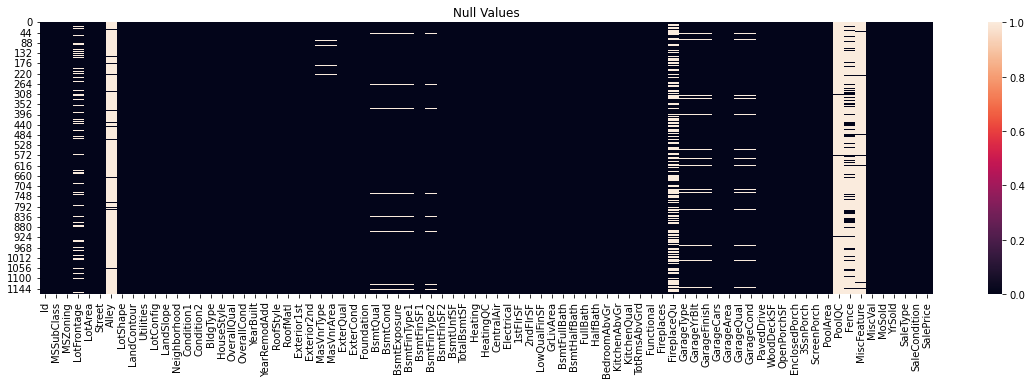

In [16]:
#Checking the null values using heat map:
plt.figure(figsize=(20,5))
sns.heatmap(df_train.isnull())
plt.title('Null Values')
plt.show()

we will delete the features which have more than 80% null values.

FILLING MISSING VALUES:

In [17]:
# filling the missing values of the categorical features with mode and filling the continuous feature with mean method.
# Filling missing values:

df_train['LotFrontage']=df_train['LotFrontage'].fillna(df_train['LotFrontage'].mean())
df_train.drop(['Alley'],axis=1,inplace=True)

- dropping the alley column because this feature is having 80% of null values.

In [18]:
df_train['MasVnrType']=df_train['MasVnrType'].fillna(df_train['MasVnrType'].mode()[0])
df_train['MasVnrArea']=df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].mean())
df_train['BsmtQual']=df_train['BsmtQual'].fillna(df_train['BsmtQual'].mode()[0])
df_train['BsmtCond']=df_train['BsmtCond'].fillna(df_train['BsmtCond'].mode()[0])
df_train['BsmtExposure']=df_train['BsmtExposure'].fillna(df_train['BsmtExposure'].mode()[0])
df_train['BsmtFinType1']=df_train['BsmtFinType1'].fillna(df_train['BsmtFinType1'].mode()[0])
df_train['GarageCond']=df_train['GarageCond'].fillna(df_train['GarageCond'].mode()[0])
df_train['GarageYrBlt']=df_train['GarageYrBlt'].fillna(df_train['GarageYrBlt'].mean())
df_train['BsmtFinType2']=df_train['BsmtFinType2'].fillna(df_train['BsmtFinType2'].mode()[0])
df_train['FireplaceQu']=df_train['FireplaceQu'].fillna(df_train['FireplaceQu'].mode()[0])
df_train['GarageType']=df_train['GarageType'].fillna(df_train['GarageType'].mode()[0])
df_train['GarageFinish']=df_train['GarageFinish'].fillna(df_train['GarageFinish'].mode()[0])
df_train['GarageQual']=df_train['GarageQual'].fillna(df_train['GarageQual'].mode()[0])


In [19]:
df_train.drop(['PoolQC'],axis=1,inplace=True)
df_train.drop(['Fence'],axis=1,inplace=True)
df_train.drop(['MiscFeature'],axis=1,inplace=True)

- dropping this columns because these features are having 80% of null values.

In [20]:
df_train.drop(['Id'],axis=1,inplace=True)

 droping id column because,id column suggests on sequential numbers,which will not be helpful in building model.

In [21]:
#Checking null values:
pd.set_option('display.max_rows',None)
df_train.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

all the null values are removed.

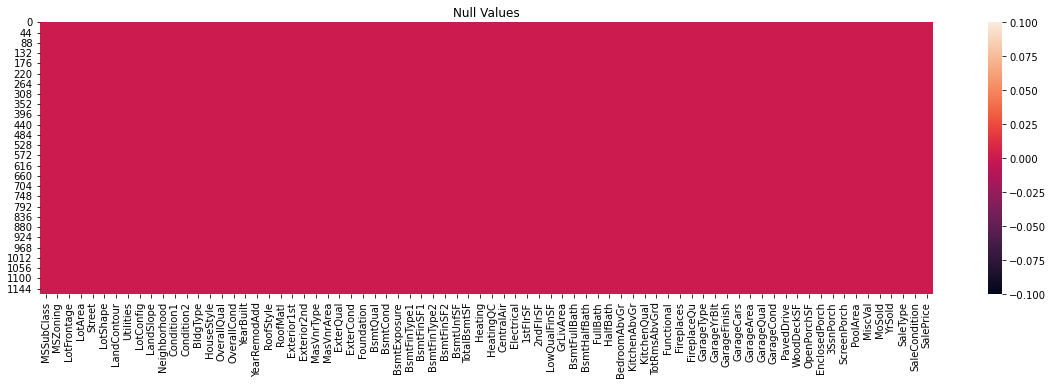

In [22]:
# Checking null values again after removing the null values:
plt.figure(figsize=(20,5))
sns.heatmap(df_train.isnull())
plt.title('Null Values')
plt.show()

In [23]:
df_train.shape

(1168, 76)

 Now we have 1168 rows and 76 columns in the train dataset.

EDA:-


UNIVARIATE ANALYSIS:

RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64

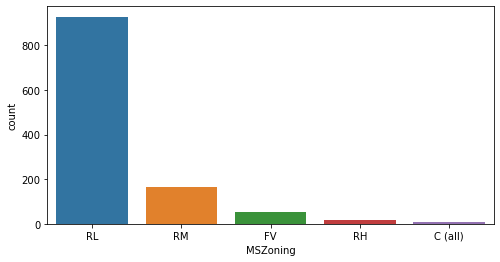

In [24]:
# Plotting the MSZoning column:
plt.figure(figsize=(8,4))
sns.countplot(df_train['MSZoning'])
df_train['MSZoning'].value_counts()

   A    Agriculture
   
   C    Commercial
   
   FV   Floating Village Residential
   
   I    Industrial
   
   
   RH   Residential High Density
   

   RL   Residential Low Density
    
   RP   Residential Low Density 
   
   RM   Residential Medium Density

we can see that Residential low density is higher in number and Commercial properties is lower in number available for sale.

Pave    1164
Grvl       4
Name: Street, dtype: int64

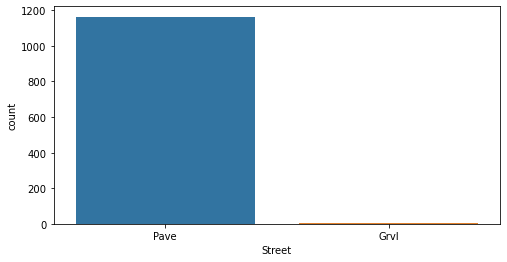

In [25]:
# Plotting the Street column:
plt.figure(figsize=(8,4))
sns.countplot(df_train['Street'])
df_train['Street'].value_counts()

 Grvl Gravel  
   Pave Paved
- Most of the properties have paved roads.

In [ ]:
# Plotting the LotShape column:
plt.figure(figsize=(8,4))
sns.countplot(df_train['LotShape'])
df_train['LotShape'].value_counts()

LotShape: General shape of property

 Reg  Regular 
 
 IR1  Slightly irregular
 
 IR2  Moderately Irregular
 
 IR3  Irregular

Most of the property in the train dataset is regular in shape.

Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64

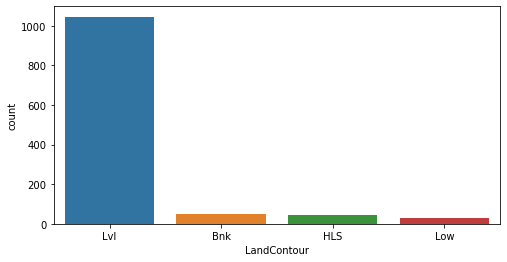

In [27]:
# Plotting the LandContour column:
plt.figure(figsize=(8,4))
sns.countplot(df_train['LandContour'])
df_train['LandContour'].value_counts()

LandContour: Flatness of the property

 
Lvl  Near Flat/Level 

Bnk  Banked - Quick and significant rise from street grade to building

HLS  Hillside - Significant slope from side to side

Low  Depression

Most of the property is LVL in nature.

AllPub    1168
Name: Utilities, dtype: int64

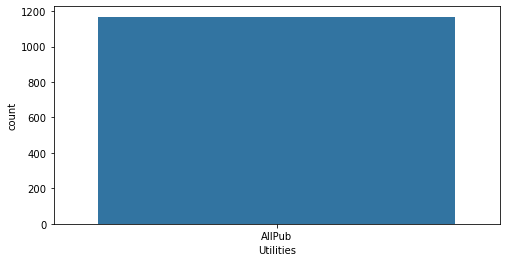

In [28]:
# Plotting the Utilities column:
plt.figure(figsize=(8,4))
sns.countplot(df_train['Utilities'])
df_train['Utilities'].value_counts()

Utilities: Type of utilities available


    AllPub   All public Utilities (E,G,W,& S)    
 
NoSewr   Electricity, Gas, and Water (Septic Tank)

NoSeWa   Electricity and Gas Only

ELO  Electricity only

All the propperties is having all the public Utilities (E,G,W,& S).

Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64

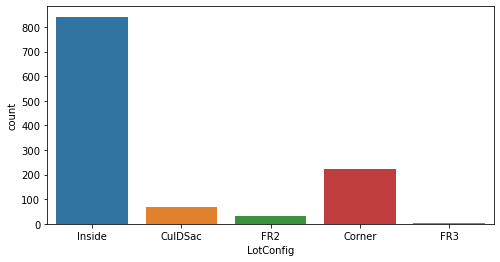

In [29]:
# Plotting the LotConfig column:
plt.figure(figsize=(8,4))
sns.countplot(df_train['LotConfig'])
df_train['LotConfig'].value_counts()

LotConfig: Lot configuration

   
   Inside   Inside lot
   
   Corner   Corner lot
   
   CulDSac  Cul-de-sac
   
   FR2  Frontage on 2 sides of property
   
   FR3  Frontage on 3 sides of property

Most of the properties is having frontage

Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64

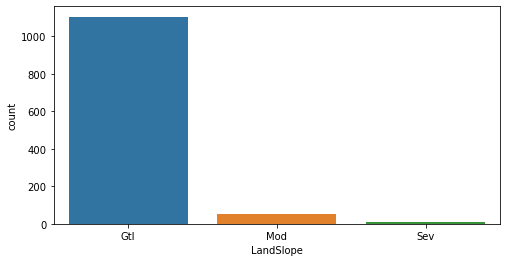

In [30]:
# Plotting the LandSlope column:
plt.figure(figsize=(8,4))
sns.countplot(df_train['LandSlope'])
df_train['LandSlope'].value_counts()

Most of the property is having gentle slope.

<AxesSubplot:xlabel='Neighborhood', ylabel='count'>

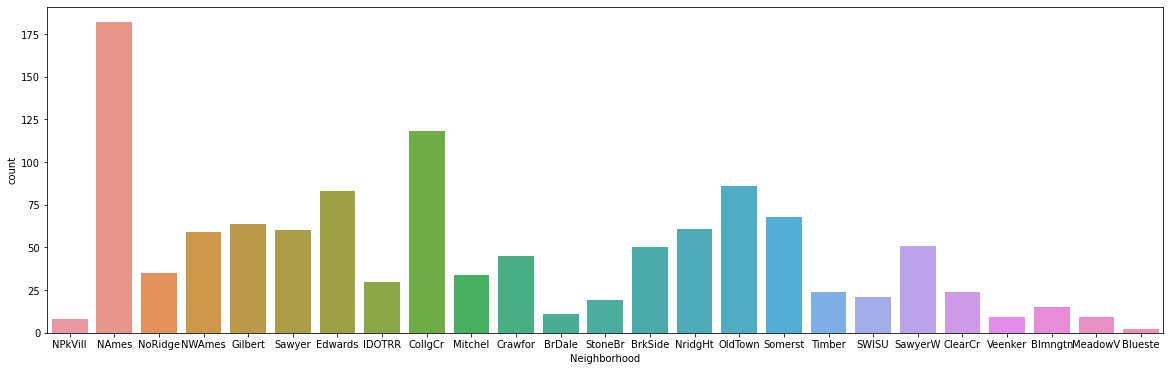

In [31]:
#Checking different type of Neighborhood type:
plt.figure(figsize = (20,6))
sns.countplot(df_train.Neighborhood)

Neighborhood: Physical locations within Ames city limits

 
Blmngtn  Bloomington Heights

Blueste  Bluestem

BrDale   Briardale

BrkSide  Brookside

ClearCr  Clear Creek

CollgCr  College Creek

Crawfor  Crawford

Edwards  Edwards

Gilbert  Gilbert

IDOTRR   Iowa DOT and Rail Road

MeadowV  Meadow Village

Mitchel  Mitchell

Names    North Ames

NoRidge  Northridge

NPkVill  Northpark Villa

NridgHt  Northridge Heights

NWAmes   Northwest Ames

OldTown  Old Town

SWISU    South & West of Iowa State University

Sawyer   Sawyer

SawyerW  Sawyer West

Somerst  Somerset

StoneBr  Stone Brook

Timber   Timberland

Veenker  Veenker

Most of the nighborhood is in Northwest Ames.

Norm      1005
Feedr       67
Artery      38
RRAn        20
PosN        17
RRAe         9
PosA         6
RRNn         4
RRNe         2
Name: Condition1, dtype: int64

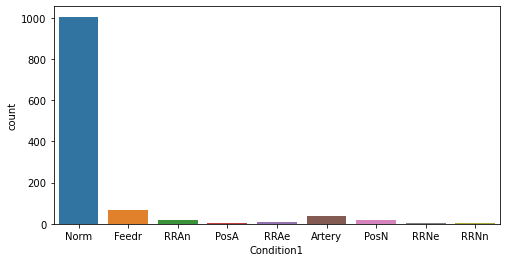

In [32]:
# Plotting the Condition1 column:
plt.figure(figsize=(8,4))
sns.countplot(df_train['Condition1'])
df_train['Condition1'].value_counts()

Condition1: Proximity to various conditions:

 
Artery   Adjacent to arterial street.

Feedr    Adjacent to feeder street.  

Norm Normal. 

RRNn Within 200' of North-South Railroad.

RRAn Adjacent to North-South Railroad.

PosN Near positive off-site feature--park, greenbelt, etc.

PosA Adjacent to postive off-site feature.

RRNe Within 200' of East-West Railroad.

RRAe Adjacent to East-West Railroad.

Most of the condition1 is Normal type.

Norm      1154
Feedr        6
PosN         2
Artery       2
RRAe         1
RRNn         1
PosA         1
RRAn         1
Name: Condition2, dtype: int64

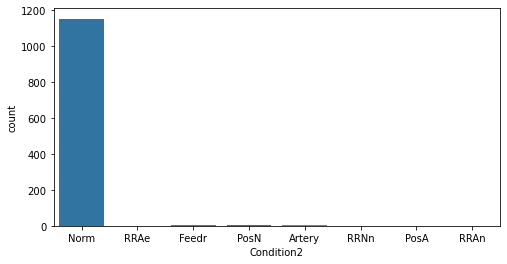

In [33]:
# Plotting the Condition2 column:
plt.figure(figsize=(8,4))
sns.countplot(df_train['Condition2'])
df_train['Condition2'].value_counts()

Condition2: Proximity to various conditions (if more than one is present):


Artery   Adjacent to arterial street.

Feedr    Adjacent to feeder street.  

Norm Normal. 

RRNn Within 200' of North-South Railroad.

RRAn Adjacent to North-South Railroad.

PosN Near positive off-site feature--park, greenbelt, etc.

PosA Adjacent to postive off-site feature.

RRNe Within 200' of East-West Railroad.

RRAe Adjacent to East-West Railroad.

Most of the condition2 is Normal type.

1Fam      981
TwnhsE     90
Duplex     41
Twnhs      29
2fmCon     27
Name: BldgType, dtype: int64

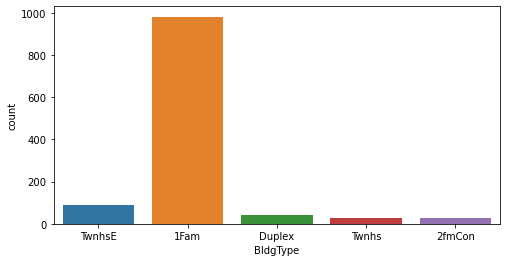

In [34]:
# Plotting the BldgType column:
plt.figure(figsize=(8,4))
sns.countplot(df_train['BldgType'])
df_train['BldgType'].value_counts()

BldgType: Type of dwelling


1Fam Single-family Detached. 

2FmCon   Two-family Conversion; originally built as one-family dwelling.

Duplx    Duplex.

TwnhsE   Townhouse End Unit.

TwnhsI   Townhouse Inside Unit.

Most of the propert

1Story    578
2Story    361
1.5Fin    121
SLvl       47
SFoyer     32
1.5Unf     12
2.5Unf     10
2.5Fin      7
Name: HouseStyle, dtype: int64

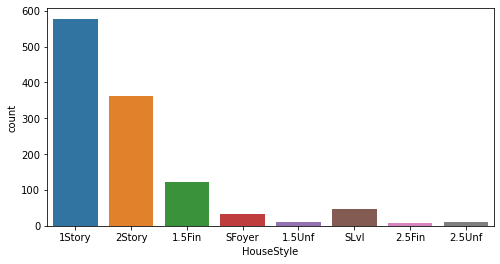

In [35]:
# Plotting the HouseStyle column:
plt.figure(figsize=(8,4))
sns.countplot(df_train['HouseStyle'])
df_train['HouseStyle'].value_counts()

HouseStyle: Style of dwelling:

 
1Story   One story

1.5Fin   One and one-half story: 2nd level finished

1.5Unf   One and one-half story: 2nd level unfinished

2Story   Two story

2.5Fin   Two and one-half story: 2nd level finished

2.5Unf   Two and one-half story: 2nd level unfinished

SFoyer   Split Foyer

SLvl Split Level

Most of the properties are One story.

Gable      915
Hip        225
Flat        12
Gambrel      9
Mansard      5
Shed         2
Name: RoofStyle, dtype: int64

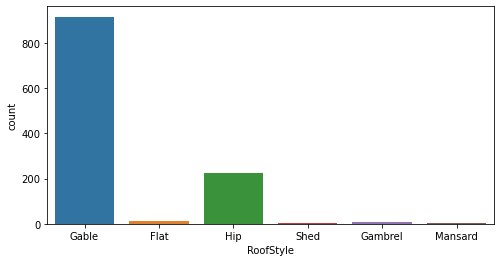

In [36]:
# Plotting the RoofStyle column:
plt.figure(figsize=(8,4))
sns.countplot(df_train['RoofStyle'])
df_train['RoofStyle'].value_counts()

RoofStyle: Type of roof:


Flat Flat

Gable    Gable

Gambrel  Gabrel (Barn)

Hip  Hip

Mansard  Mansard

Shed Shed.

Most of the Roofstyle of the properties is Gable type.

CompShg    1144
Tar&Grv      10
WdShngl       6
WdShake       4
Roll          1
ClyTile       1
Metal         1
Membran       1
Name: RoofMatl, dtype: int64

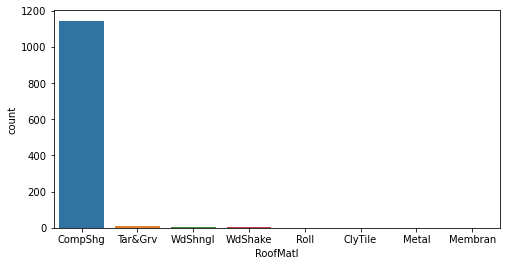

In [37]:
# Plotting the RoofMatl column:
plt.figure(figsize=(8,4))
sns.countplot(df_train['RoofMatl'])
df_train['RoofMatl'].value_counts()

RoofMatl: Roof material

 
ClyTile  Clay or Tile

CompShg  Standard (Composite) Shingle

Membran  Membrane

Metal    Metal

Roll Roll

Tar&Grv  Gravel & Tar

WdShake  Wood Shakes

WdShngl  Wood Shingles

Most of the properties have Roof material Clay or Tile.

<AxesSubplot:xlabel='Exterior1st', ylabel='count'>

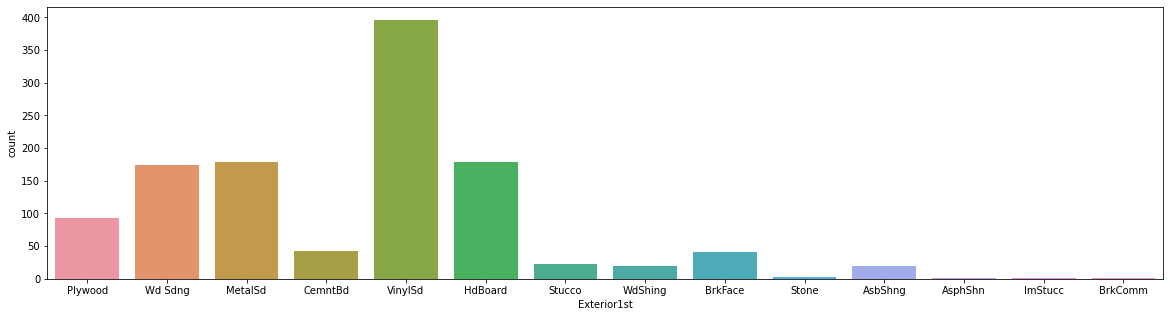

In [38]:
#Checking different type of Exterior1st type:
plt.figure(figsize = (20,5))
sns.countplot(df_train.Exterior1st)

Exterior1st: Exterior covering on house:

 
AsbShng  Asbestos Shingles

AsphShn  Asphalt Shingles

BrkComm  Brick Common

BrkFace  Brick Face

CBlock   Cinder Block

CemntBd  Cement Board

HdBoard  Hard Board

ImStucc  Imitation Stucco

MetalSd  Metal Siding

Other    Other

Plywood  Plywood

PreCast  PreCast 

Stone    Stone

Stucco   Stucco

VinylSd  Vinyl Siding

Wd Sdng  Wood Siding

WdShing  Wood Shingles

Most of Exterior covering on house is Vinyl Siding.

<AxesSubplot:xlabel='Exterior2nd', ylabel='count'>

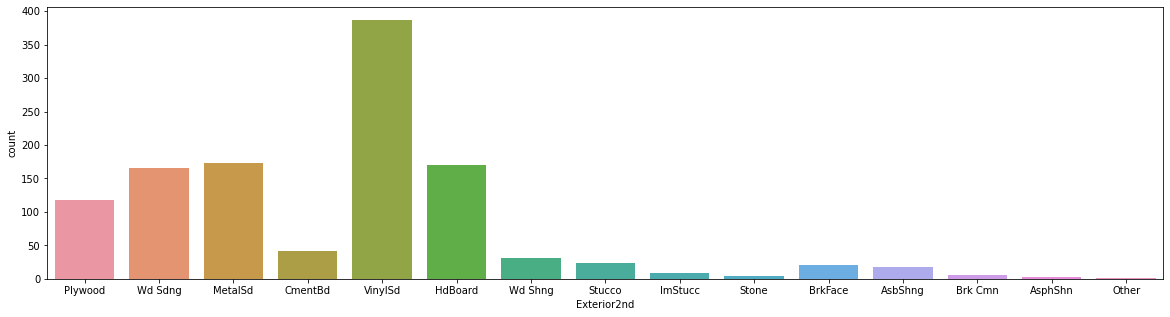

In [39]:
#Checking different type of Exterior2nd type:
plt.figure(figsize = (20,5))
sns.countplot(df_train.Exterior2nd)

Exterior2nd: Exterior covering on house (if more than one material)


AsbShng  Asbestos Shingles

AsphShn  Asphalt Shingles

BrkComm  Brick Common

BrkFace  Brick Face

CBlock   Cinder Block

CemntBd  Cement Board

HdBoard  Hard Board

ImStucc  Imitation Stucco

MetalSd  Metal Siding

Other    Other

Plywood  Plywood

PreCast  PreCast

Stone    Stone

Stucco   Stucco

VinylSd  Vinyl Siding

Wd Sdng  Wood Siding

WdShing  Wood Shingles

Most of the properties have Vinyl Siding in Exterior covering on house.

None       703
BrkFace    354
Stone       98
BrkCmn      13
Name: MasVnrType, dtype: int64

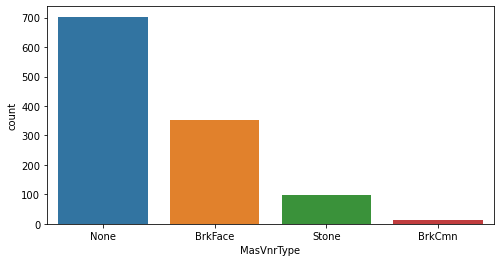

In [40]:
# Plotting the MasVnrType column:
plt.figure(figsize=(8,4))
sns.countplot(df_train['MasVnrType'])
df_train['MasVnrType'].value_counts()

MasVnrType: Masonry veneer type:


BrkCmn   Brick Common

BrkFace  Brick Face

CBlock   Cinder Block

None None

Stone    Stone

Most of the properties dont have Masonry veneer type,In rest of them Brick Face type is higher.

TA    717
Gd    397
Ex     43
Fa     11
Name: ExterQual, dtype: int64

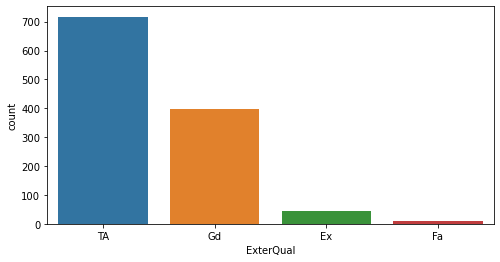

In [41]:
# Plotting the ExterQual column:
plt.figure(figsize=(8,4))
sns.countplot(df_train['ExterQual'])
df_train['ExterQual'].value_counts()

TA    717
Gd    397
Ex     43
Fa     11
Name: ExterQual, dtype: int64

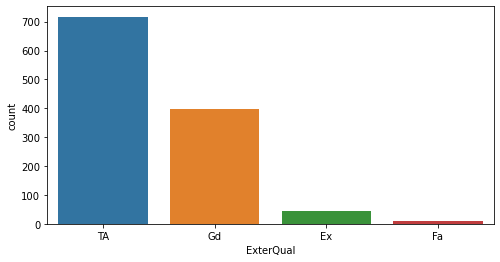

In [42]:
# Plotting the ExterQual column:
plt.figure(figsize=(8,4))
sns.countplot(df_train['ExterQual'])
df_train['ExterQual'].value_counts()

ExterQual: Evaluates the quality of the material on the exterior :

 
 Ex   Excellent
 
 Gd   Good
 
 TA   Average/Typical
 
 Fa   Fair
 
 Po   Poor

Most of the properties are built with Average/Typical quality of the material on the exterior.

TA    1022
Gd     117
Fa      26
Ex       2
Po       1
Name: ExterCond, dtype: int64

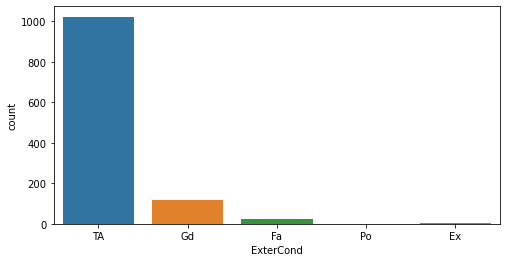

In [43]:
# Plotting the ExterCond column:
plt.figure(figsize=(8,4))
sns.countplot(df_train['ExterCond'])
df_train['ExterCond'].value_counts()

ExterCond: Evaluates the present condition of the material on the exterior.

 
 Ex   Excellent
 
 Gd   Good
 
 TA   Average/Typical
 
 Fa   Fair
 
 Po   Poor

The present condition of the material on the exterior in most of the properties is Average/Typical.

No    787
Av    180
Gd    108
Mn     93
Name: BsmtExposure, dtype: int64

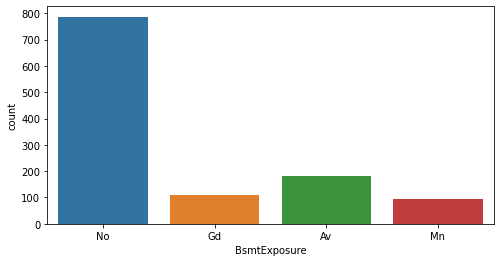

In [44]:
# Plotting the BsmtExposure column:
plt.figure(figsize=(8,4))
sns.countplot(df_train['BsmtExposure'])
df_train['BsmtExposure'].value_counts()

BsmtExposure: Refers to walkout or garden level walls:

 
Gd   Good Exposure

Av   Average Exposure (split levels or foyers typically score average or above)  

Mn   Mimimum Exposure

No   No Exposure

NA   No Basement

Most of the properties Dont have exposure.

Unf    375
GLQ    330
ALQ    174
BLQ    121
Rec    109
LwQ     59
Name: BsmtFinType1, dtype: int64

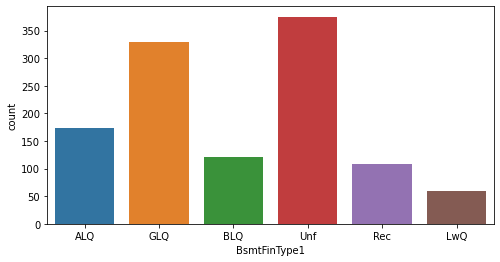

In [45]:
# Plotting the BsmtFinType1 column:
plt.figure(figsize=(8,4))
sns.countplot(df_train['BsmtFinType1'])
df_train['BsmtFinType1'].value_counts()

BsmtFinType1: Rating of basement finished area:

 
GLQ  Good Living Quarters

ALQ  Average Living Quarters

BLQ  Below Average Living Quarters   

Rec  Average Rec Room

LwQ  Low Quality

Unf  Unfinshed

NA   No Basement

Most of the proerties basement is unfinished.

Unf    1033
Rec      43
LwQ      40
BLQ      24
ALQ      16
GLQ      12
Name: BsmtFinType2, dtype: int64

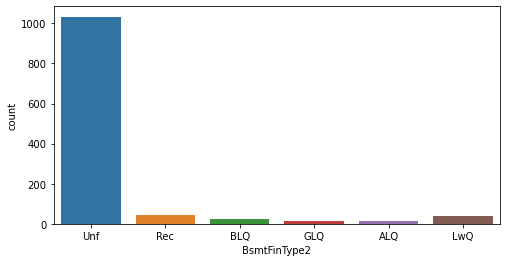

In [46]:
# Plotting the BsmtFinType2 column:
plt.figure(figsize=(8,4))
sns.countplot(df_train['BsmtFinType2'])
df_train['BsmtFinType2'].value_counts()

BsmtFinType2: Rating of basement finished area (if multiple types)


GLQ  Good Living Quarters

ALQ  Average Living Quarters

BLQ  Below Average Living Quarters   

Rec  Average Rec Room

LwQ  Low Quality

Unf  Unfinshed

NA   No Basement

Rating of basement finished area (if multiple types) in most of the properties is unfinished.

GasA     1143
GasW       14
Grav        5
Wall        4
Floor       1
OthW        1
Name: Heating, dtype: int64

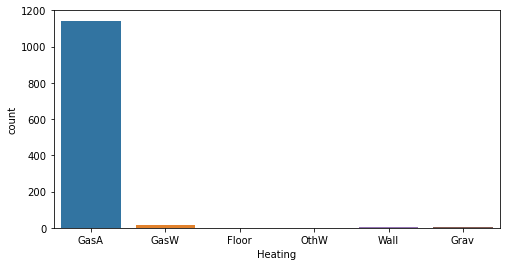

In [47]:
# Plotting the Heating column:
plt.figure(figsize=(8,4))
sns.countplot(df_train['Heating'])
df_train['Heating'].value_counts()

Heating: Type of heating:


Floor    Floor Furnace

GasA Gas forced warm air furnace

GasW Gas hot water or steam heat

Grav Gravity furnace 

OthW Hot water or steam heat other than gas

Wall Wall furnace

Type of heating in most of the properties is Gas forced warm air furnace.

Ex    585
TA    352
Gd    192
Fa     38
Po      1
Name: HeatingQC, dtype: int64

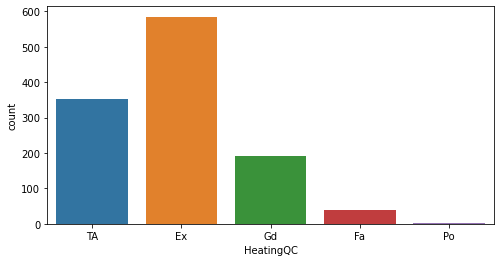

In [48]:
# Plotting the HeatingQC column:
plt.figure(figsize=(8,4))
sns.countplot(df_train['HeatingQC'])
df_train['HeatingQC'].value_counts()

HeatingQC: Heating quality and condition


Ex   Excellent

Gd   Good

TA   Average/Typical

Fa   Fair

Po   Poor

The heating quality in most of the properties is Average/Typical.

Y    1090
N      78
Name: CentralAir, dtype: int64

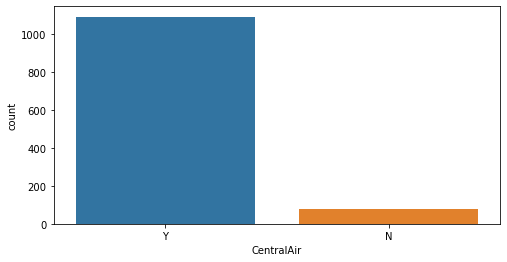

In [49]:
# Plotting the CentralAir column:
plt.figure(figsize=(8,4))
sns.countplot(df_train['CentralAir'])
df_train['CentralAir'].value_counts()

CentralAir: Central air conditioning


N    No

Y    Yes

Most of the properties have Central air conditioning facility.

SBrkr    1070
FuseA      74
FuseF      21
FuseP       2
Mix         1
Name: Electrical, dtype: int64

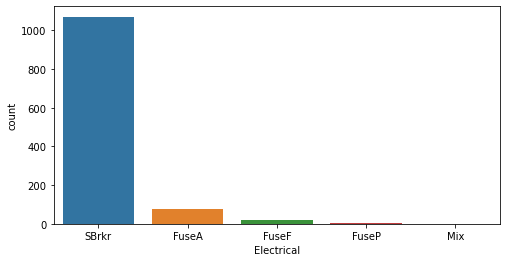

In [50]:
# Plotting the Electrical column:
plt.figure(figsize=(8,4))
sns.countplot(df_train['Electrical'])
df_train['Electrical'].value_counts()

Electrical: Electrical system

 
SBrkr    Standard Circuit Breakers & Romex

FuseA    Fuse Box over 60 AMP and all Romex wiring (Average) 

FuseF    60 AMP Fuse Box and mostly Romex wiring (Fair)

FuseP    60 AMP Fuse Box and mostly knob & tube wiring (poor)

Mix  Mixed

Most of the properties have Standard Circuit Breakers & Romex as Electrical system.


TA    578
Gd    478
Ex     82
Fa     30
Name: KitchenQual, dtype: int64

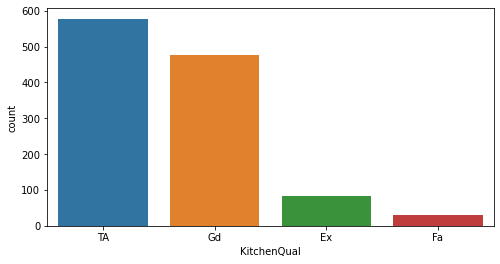

In [51]:
# Plotting the KitchenQual column:
plt.figure(figsize=(8,4))
sns.countplot(df_train['KitchenQual'])
df_train['KitchenQual'].value_counts()

KitchenQual: Kitchen quality


Ex   Excellent

Gd   Good

TA   Typical/Average

Fa   Fair

Po   Poor

The Kitchen quality of Most of the properties is Typical/Average.

Typ     1085
Min2      30
Min1      25
Mod       12
Maj1      11
Maj2       4
Sev        1
Name: Functional, dtype: int64

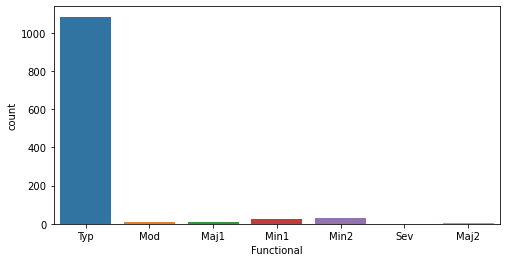

In [52]:
# Plotting the Functional column:
plt.figure(figsize=(8,4))
sns.countplot(df_train['Functional'])
df_train['Functional'].value_counts()

Functional: Home functionality (Assume typical unless deductions are warranted)

Typ  Typical Functionality

Min1 Minor Deductions 1

Min2 Minor Deductions 2

Mod  Moderate Deductions

Maj1 Major Deductions 1

Maj2 Major Deductions 2


Sev  Severely Damaged

Sal  Salvage only

Home functionality of most of the properties is Typical Functionality.

Gd    852
TA    252
Fa     25
Ex     21
Po     18
Name: FireplaceQu, dtype: int64

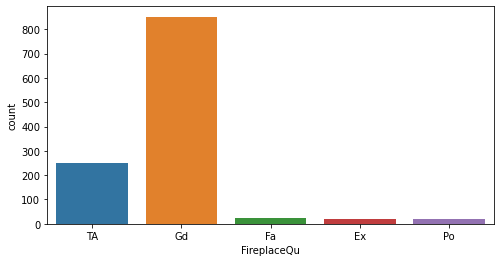

In [53]:
# Plotting the FireplaceQu column:
plt.figure(figsize=(8,4))
sns.countplot(df_train['FireplaceQu'])
df_train['FireplaceQu'].value_counts()

FireplaceQu: Fireplace quality:


Ex   Excellent - Exceptional Masonry Fireplace

Gd   Good - Masonry Fireplace in main level

TA   Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement

Fa   Fair - Prefabricated Fireplace in basement

Po   Poor - Ben Franklin Stove

NA   No Fireplace

Most of the properties have Good - (Masonry Fireplace in main level) Fireplace quality.

Attchd     755
Detchd     314
BuiltIn     70
Basment     16
CarPort      8
2Types       5
Name: GarageType, dtype: int64

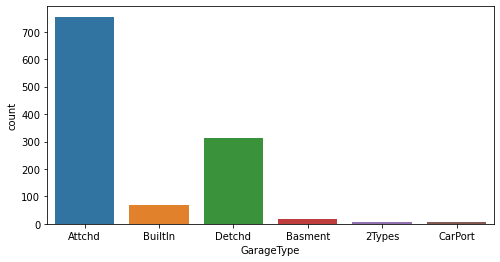

In [55]:
# Plotting the GarageType column:
plt.figure(figsize=(8,4))
sns.countplot(df_train['GarageType'])
df_train['GarageType'].value_counts()

GarageType: Garage location:


2Types   More than one type of garage

Attchd   Attached to home

Basment  Basement Garage

BuiltIn  Built-In (Garage part of house - typically has room above garage)

CarPort  Car Port

Detchd   Detached from home

NA   No Garage.

Most of the garage of the properties are attached to home.

Unf    551
RFn    339
Fin    278
Name: GarageFinish, dtype: int64

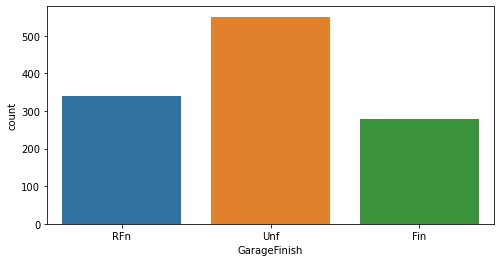

In [56]:
# Plotting the GarageFinish column:
plt.figure(figsize=(8,4))
sns.countplot(df_train['GarageFinish'])
df_train['GarageFinish'].value_counts()

GarageFinish: Interior finish of the garage


Fin  Finished

RFn  Rough Finished  

Unf  Unfinished

NA   No Garage

Interior finish of the garage of most of the properties is unfinished.

TA    1114
Fa      39
Gd      11
Ex       2
Po       2
Name: GarageQual, dtype: int64

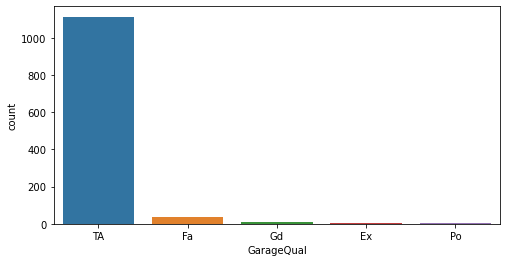

In [57]:
# Plotting the GarageQual column:
plt.figure(figsize=(8,4))
sns.countplot(df_train['GarageQual'])
df_train['GarageQual'].value_counts()

GarageQual: Garage quality


Ex   Excellent

Gd   Good

TA   Typical/Average

Fa   Fair

Po   Poor

NA   No Garage

Garage quality is Typical/Average in most of the properties.

TA    1125
Fa      28
Gd       8
Po       6
Ex       1
Name: GarageCond, dtype: int64

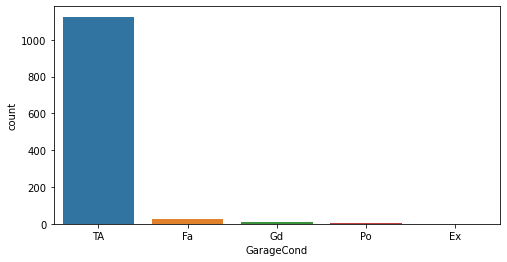

In [60]:
# Plotting the GarageCond column:
plt.figure(figsize=(8,4))
sns.countplot(df_train['GarageCond'])
df_train['GarageCond'].value_counts()

GarageCond: Garage condition


Ex   Excellent

Gd   Good

TA   Typical/Average

Fa   Fair

Po   Poor

NA   No Garage

Garage Condition is Typical/Average in most of the properties.

Y    1071
N      74
P      23
Name: PavedDrive, dtype: int64

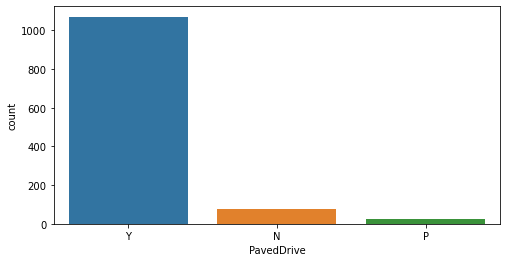

In [61]:
# Plotting the PavedDrive column:
plt.figure(figsize=(8,4))
sns.countplot(df_train['PavedDrive'])
df_train['PavedDrive'].value_counts()

PavedDrive: Paved driveway:



Y    Paved 

P    Partial Pavement

N    Dirt/Gravel

Most of the properties have Paved driveway.

WD       999
New      106
COD       38
ConLD      8
ConLI      5
ConLw      4
Oth        3
CWD        3
Con        2
Name: SaleType, dtype: int64

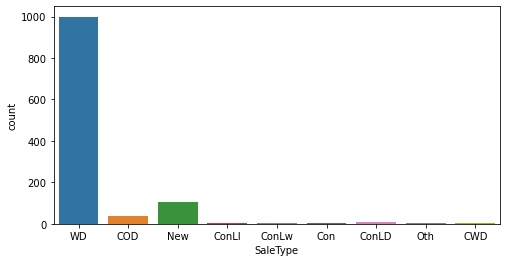

In [62]:
# Plotting the SaleType column:
plt.figure(figsize=(8,4))
sns.countplot(df_train['SaleType'])
df_train['SaleType'].value_counts()

SaleType: Type of sale:


WD   Warranty Deed - Conventional

CWD  Warranty Deed - Cash

VWD  Warranty Deed - VA Loan
 
New  Home just constructed and sold

COD  Court Officer Deed/Estate

Con  Contract 15% Down payment regular terms

ConLw    Contract Low Down payment and low interest

ConLI    Contract Low Interest

ConLD    Contract Low Down

Oth  Other

The SaleType of most of the properties are Warranty Deed - Conventional.

Normal     945
Partial    108
Abnorml     81
Family      18
Alloca      12
AdjLand      4
Name: SaleCondition, dtype: int64

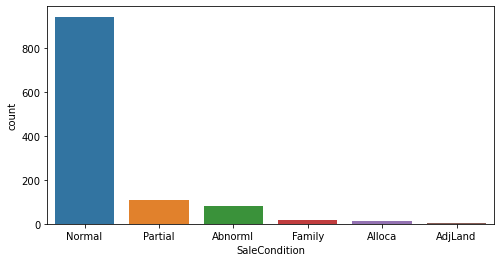

In [63]:
# Plotting the SaleCondition column:
plt.figure(figsize=(8,4))
sns.countplot(df_train['SaleCondition'])
df_train['SaleCondition'].value_counts()

SaleCondition: Condition of sale


Normal   Normal Sale

Abnorml  Abnormal Sale -  trade, foreclosure, short sale

AdjLand  Adjoining Land Purchase

Alloca   Allocation - two linked properties with separate deeds, typically condo with a garage unit  

Family   Sale between family members

Partial  Home was not completed when last assessed (associated with New Homes)

Most of the properties condition of sale is normal.

In [64]:
#Separating the continuous features:
con_features=df_train[['MSSubClass','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea',
                 'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars',
                 'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','SalePrice']]


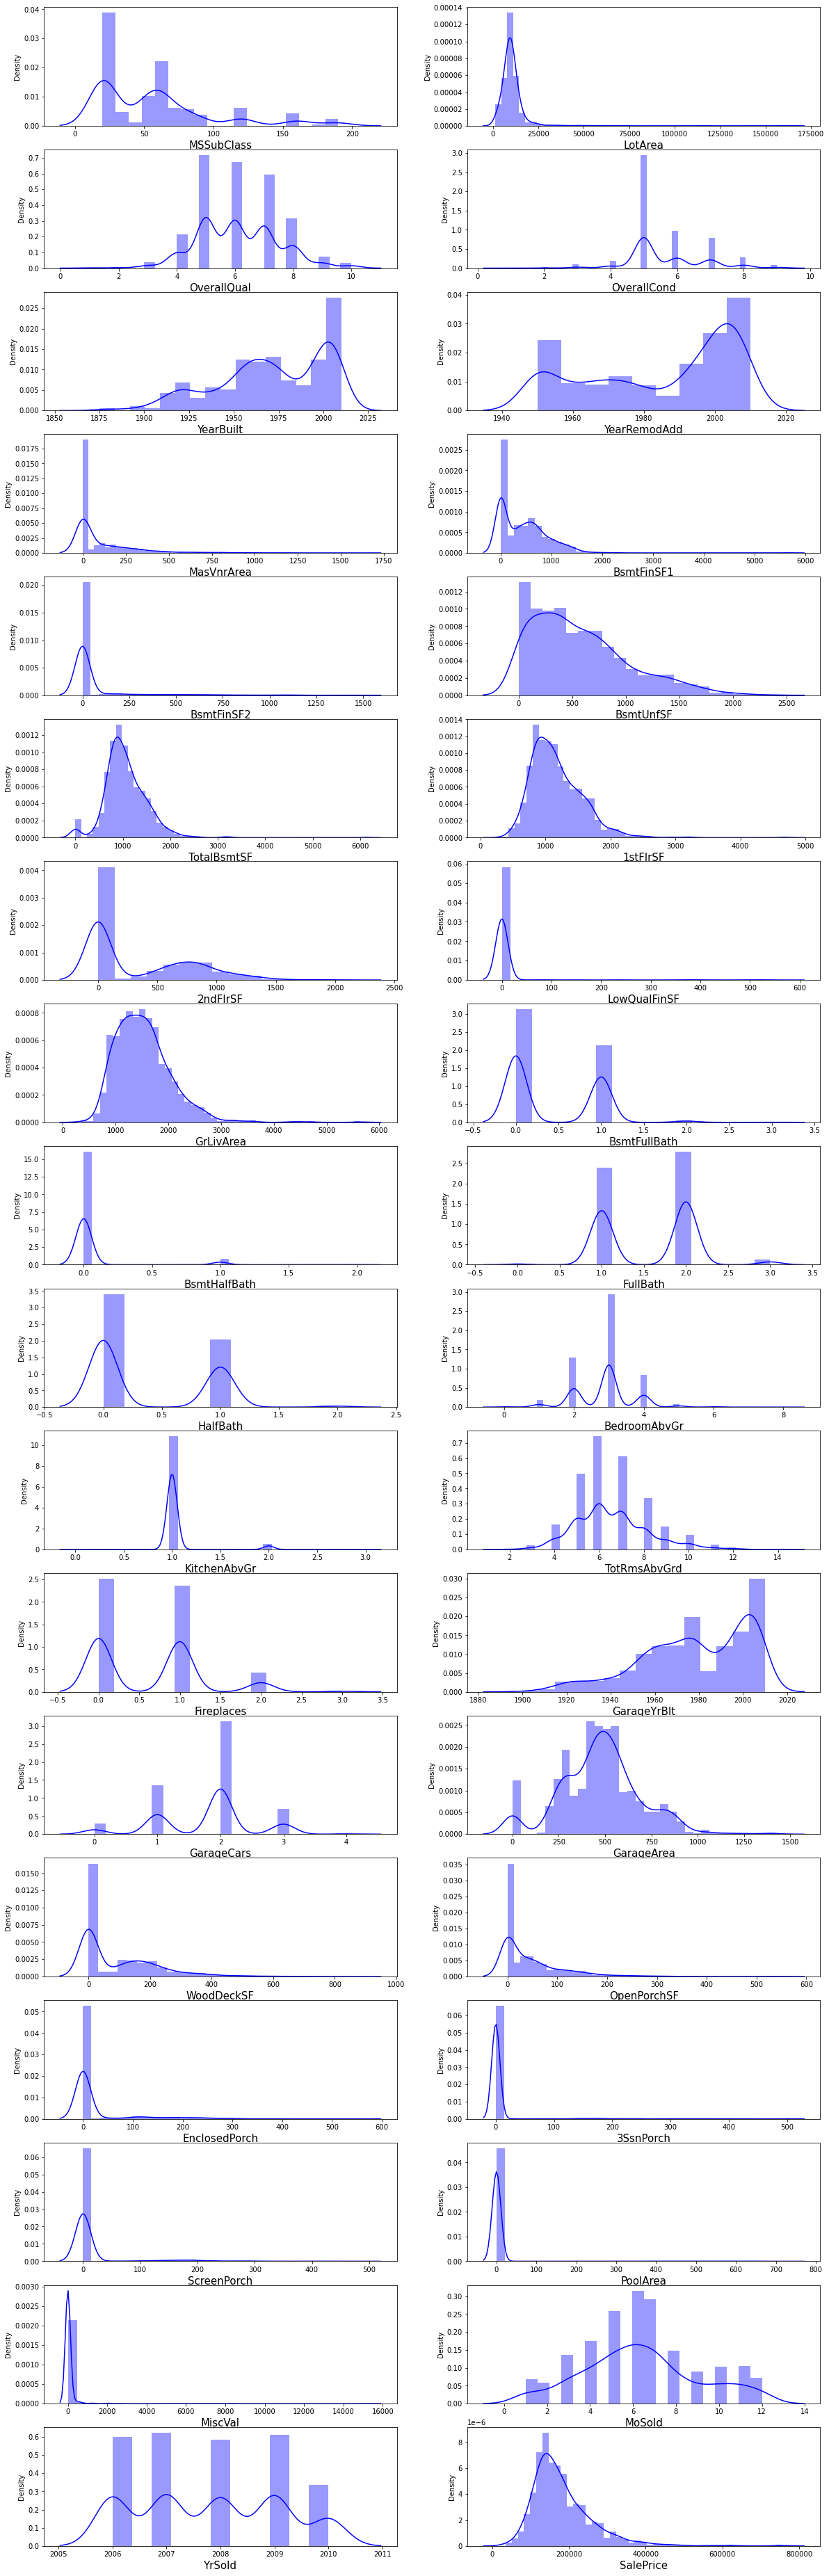

In [65]:
#Plotting the continuous features:
plt.figure(figsize = (20,150))
pltnum = 1
for i in con_features:
    if pltnum <= 40:
        plt.subplot(40,2, pltnum)
        sns.distplot(con_features[i], color = 'blue')
        plt.xlabel(i, fontsize = 15)
    pltnum+=1
plt.show()

We can see most of the features is having skewness,we will remove the skewness before putting them into the model building process.

In [66]:
#Creating a dataframe for categorical features:
categorical_features=[feature for feature in df_train.columns if df_train[feature].dtypes=='O']
df_train[categorical_features].head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      IR1         Lvl    AllPub    Inside       Mod   
2       RL   Pave      IR1         Lvl    AllPub   CulDSac       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2  ... KitchenQual Functional FireplaceQu  \
0      NPkVill       Norm       Norm  ...          TA        Typ          TA   
1        NAmes       Norm       Norm  ...          Gd        Typ          TA   
2      NoRidge       Norm       Norm  ...          TA        Typ          TA   
3       NWAmes       Norm       Norm  ...          TA        Typ          TA   
4       NWAmes       Norm       Norm  ...          Gd        Typ          TA   

  GarageType GarageFinish GarageQual GarageCond PavedDrive SaleType  \
0     Attchd          RFn         TA         TA          Y       WD   
1     Attchd          Unf         TA         TA          Y       WD   
2     Attchd          Unf         TA         TA          Y       WD   
3     Attchd          RFn         TA         TA          Y      COD   
4     Attchd          Fin         TA         TA          Y       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3        Normal  
4        Normal  

[5 rows x 39 columns]

BI VARIATE ANALYSIS:

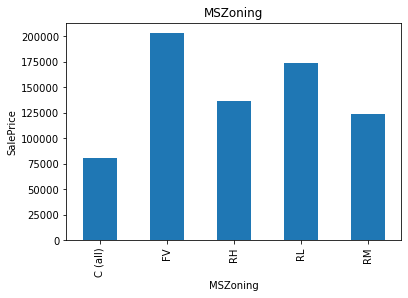

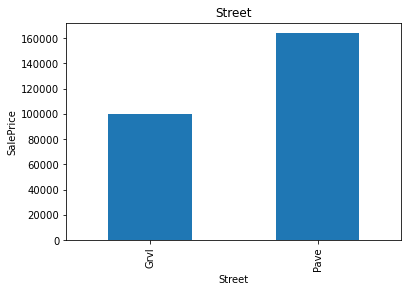

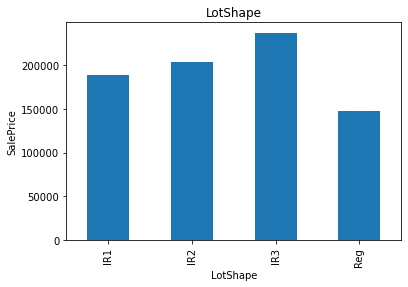

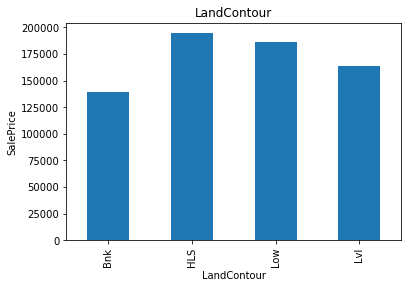

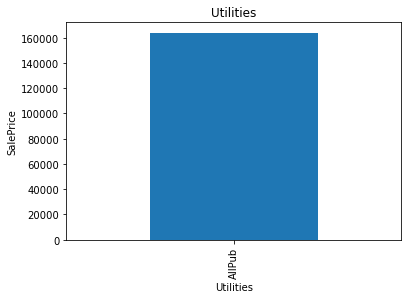

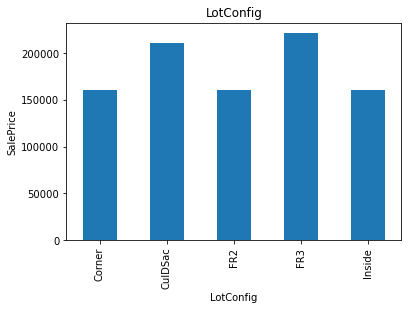

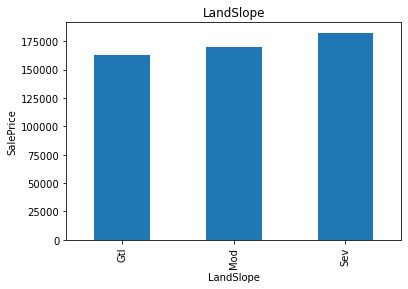

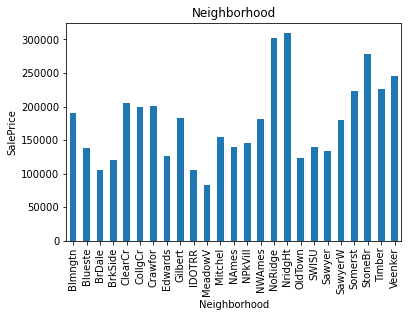

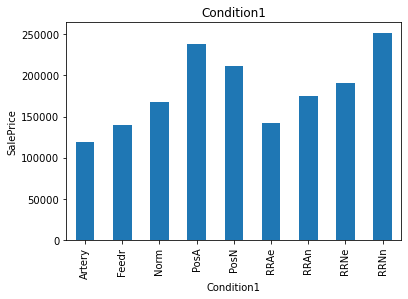

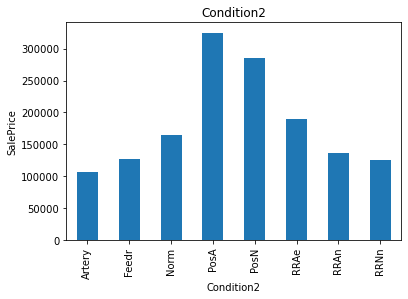

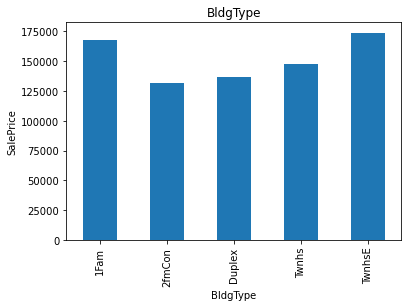

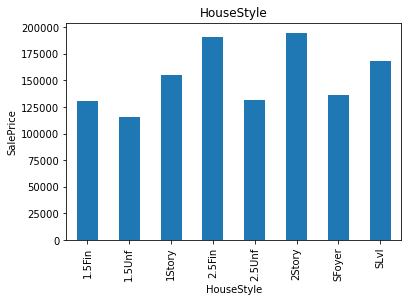

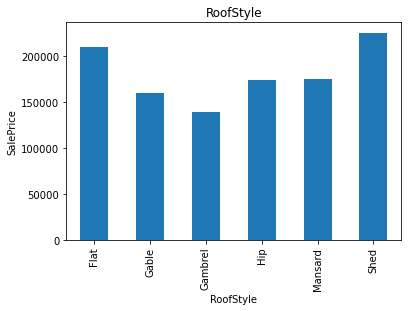

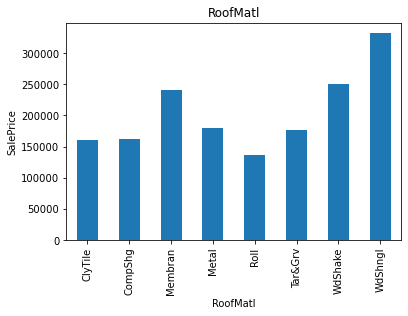

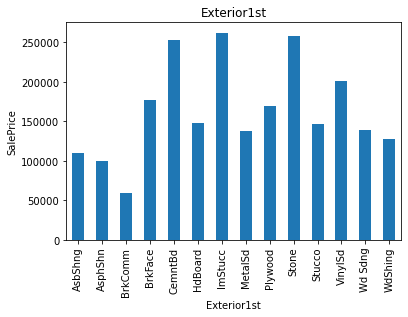

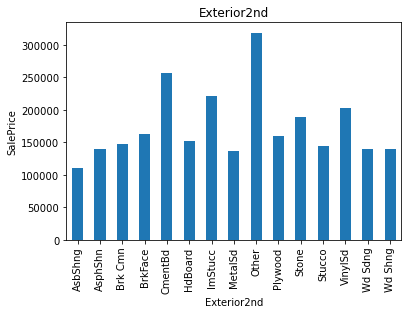

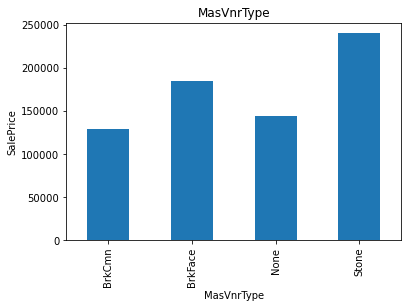

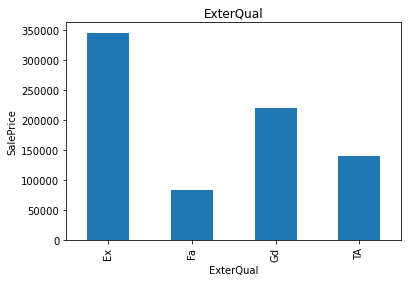

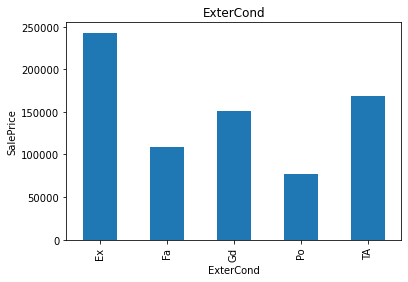

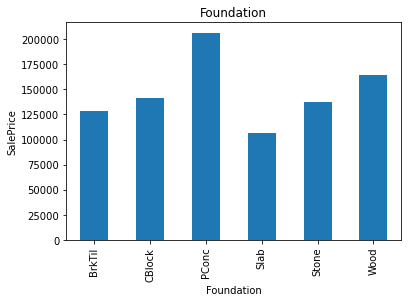

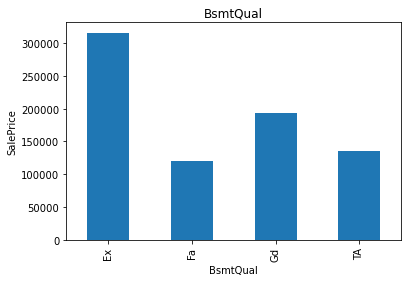

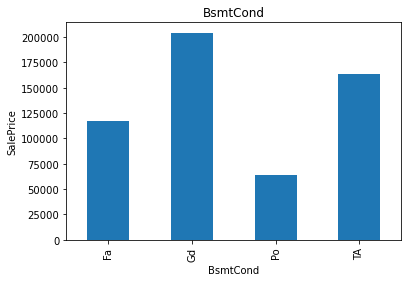

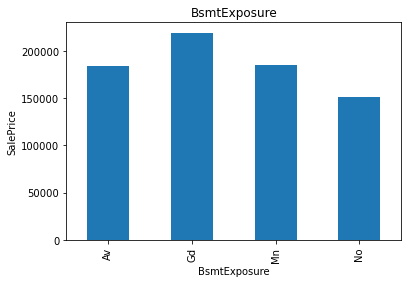

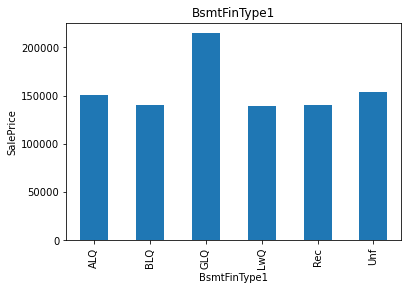

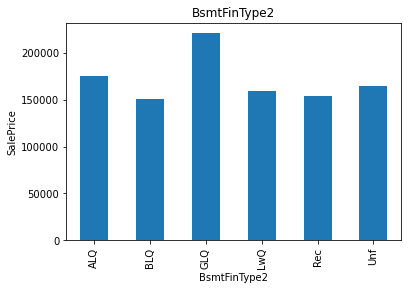

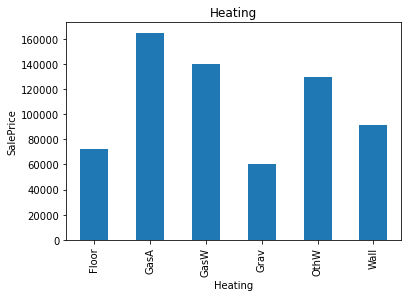

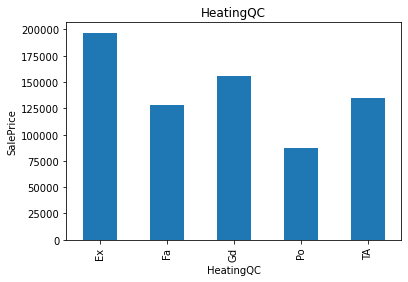

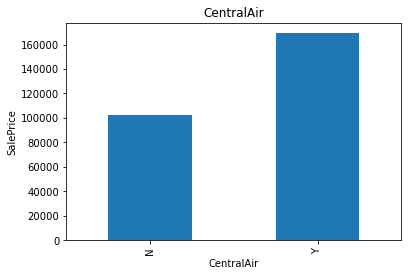

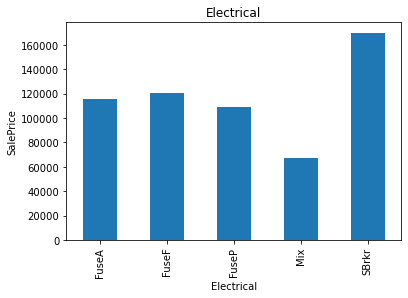

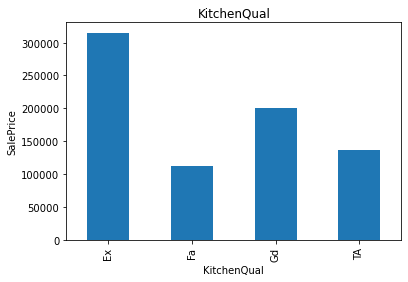

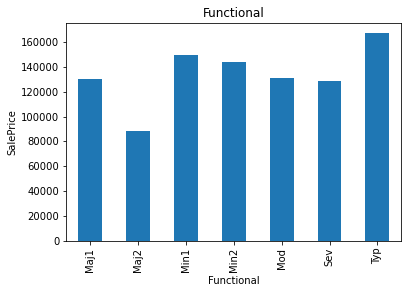

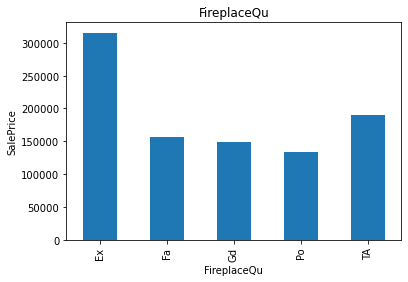

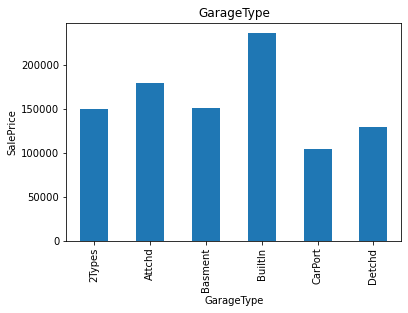

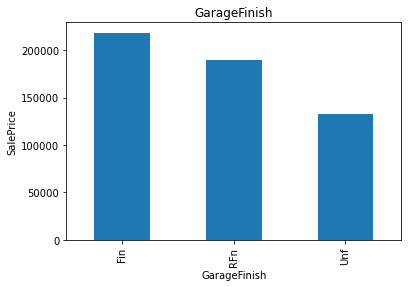

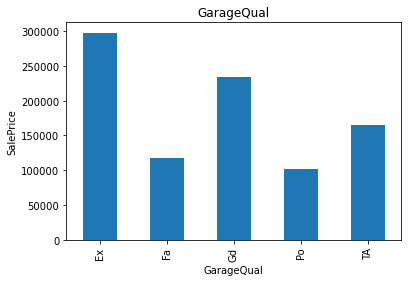

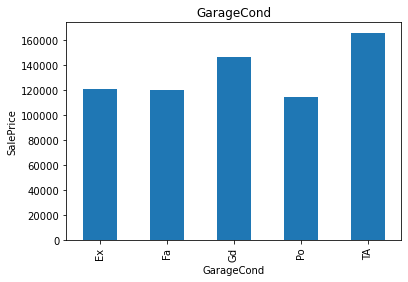

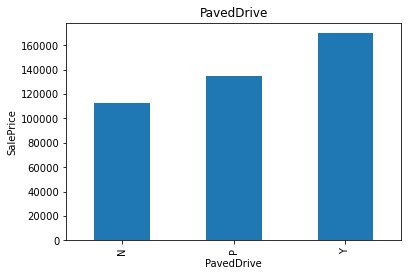

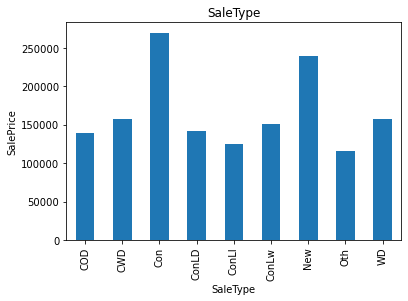

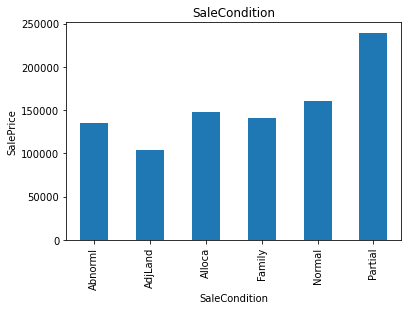

In [67]:
# Categorical variables vs SalesPrice:
for feature in categorical_features:
    data=df_train.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

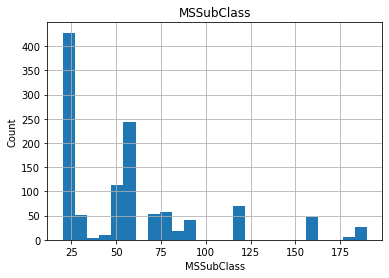

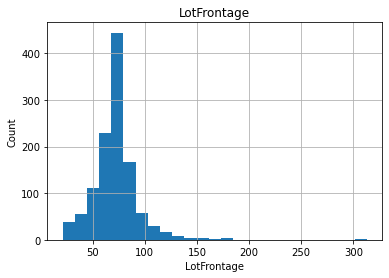

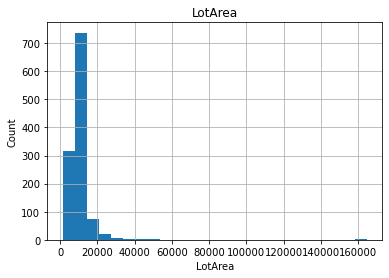

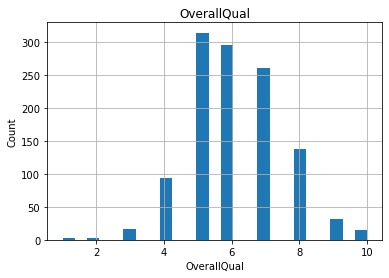

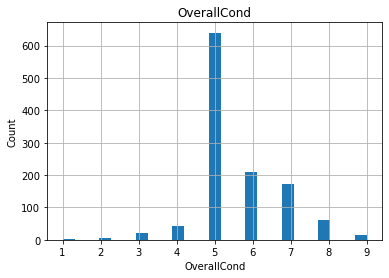

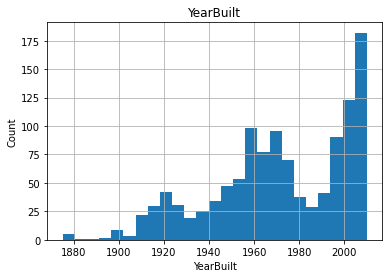

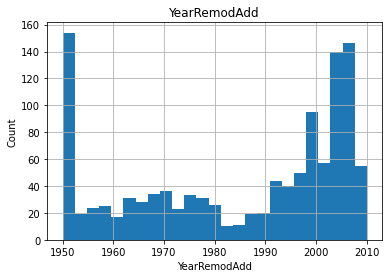

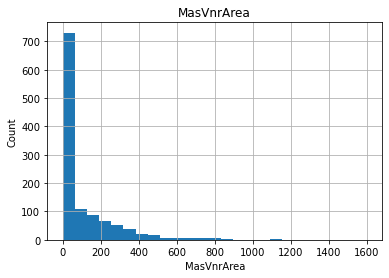

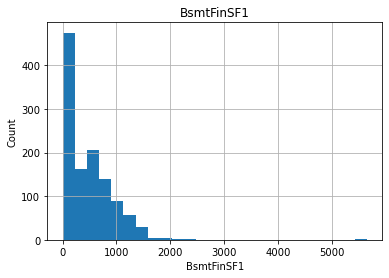

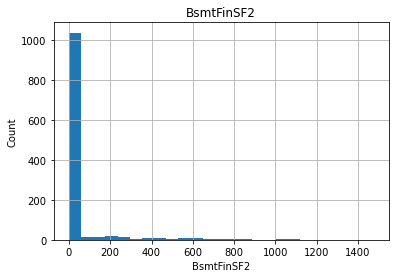

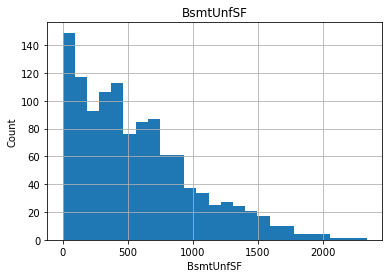

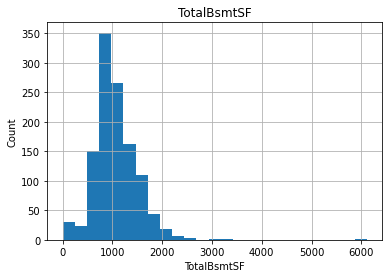

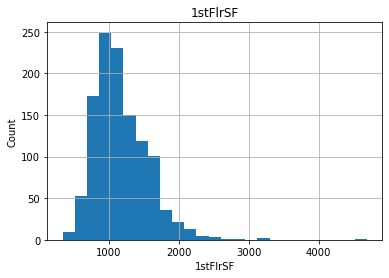

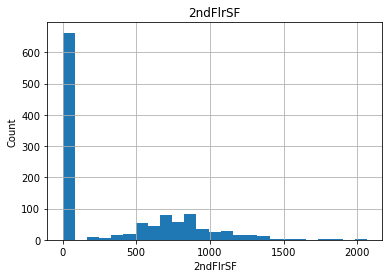

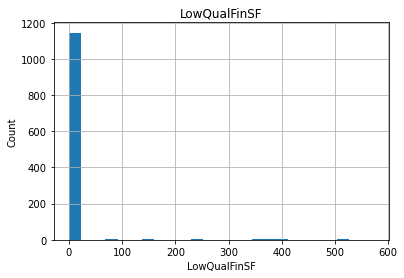

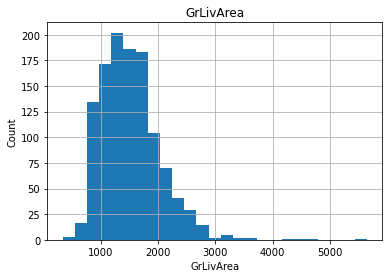

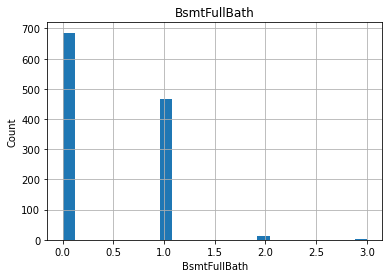

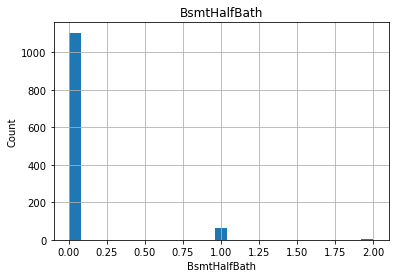

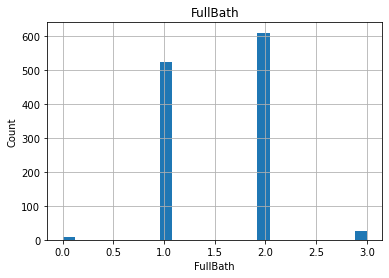

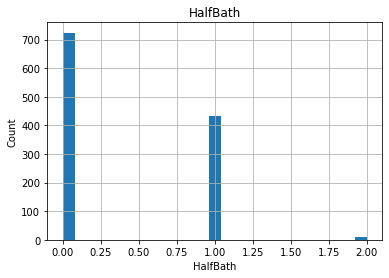

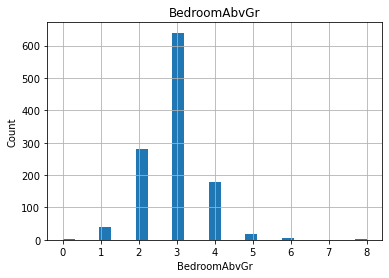

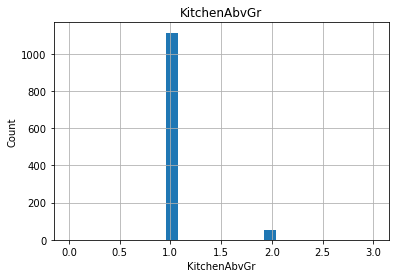

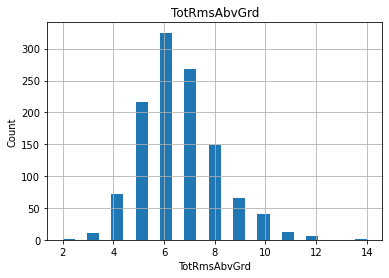

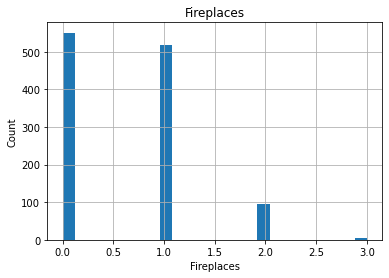

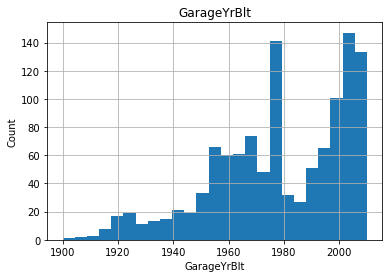

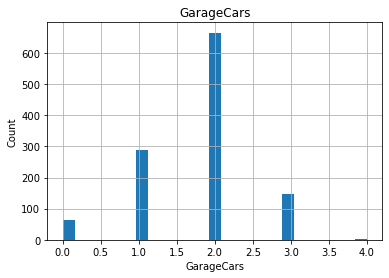

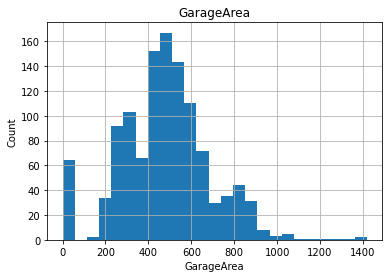

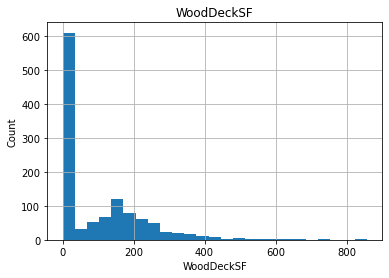

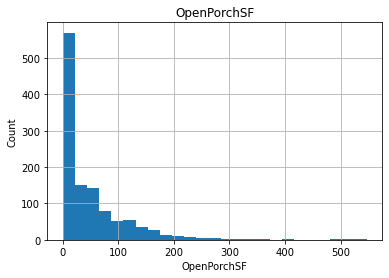

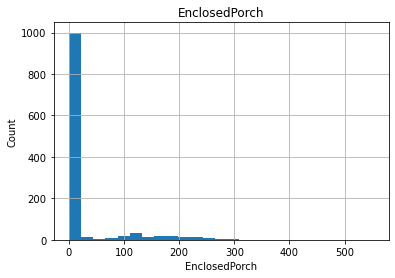

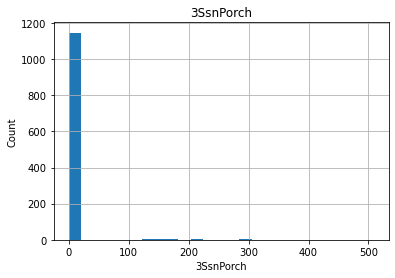

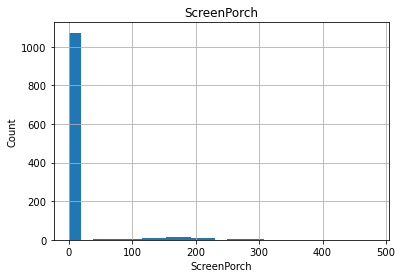

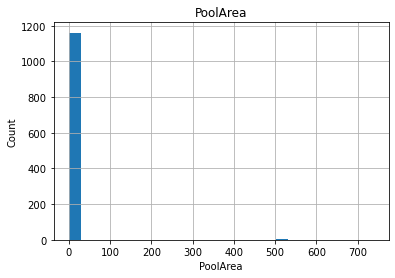

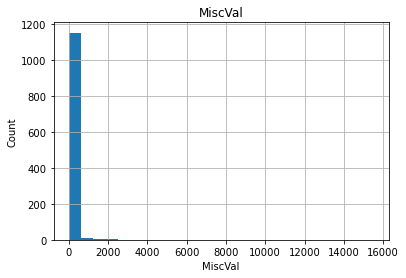

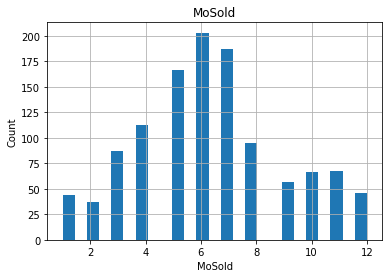

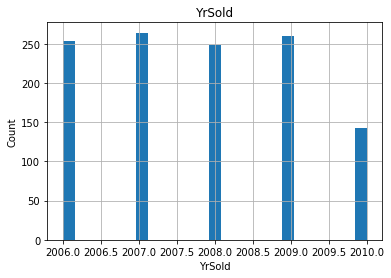

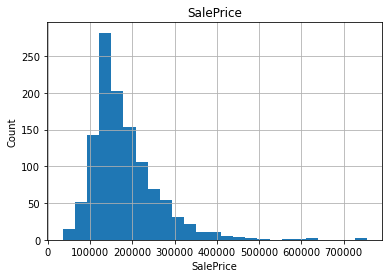

In [68]:
# Let's plot the histogram of every numerical column

for col in df_train.describe().columns:
    data=df_train.copy()
    data[col].hist(bins=25)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(col)
    plt.show()

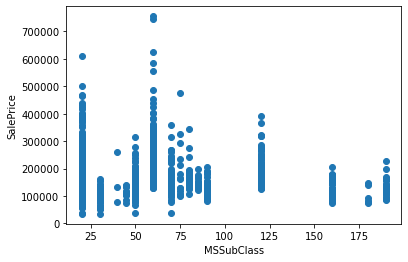

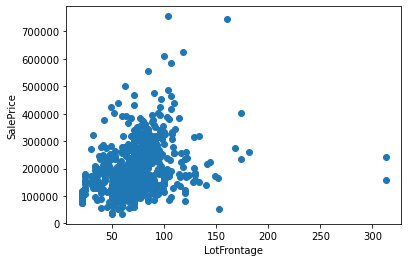

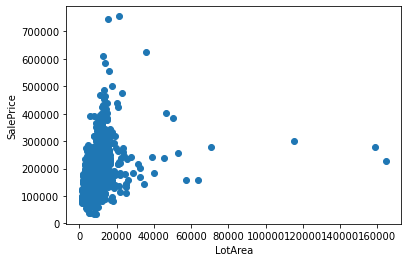

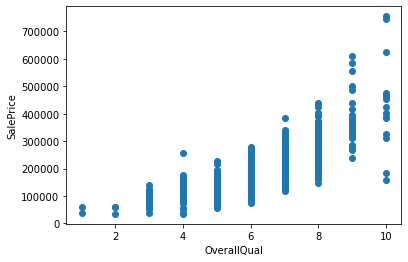

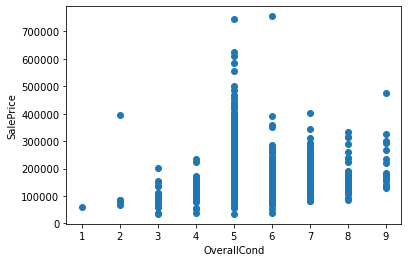

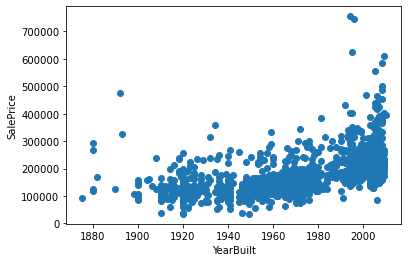

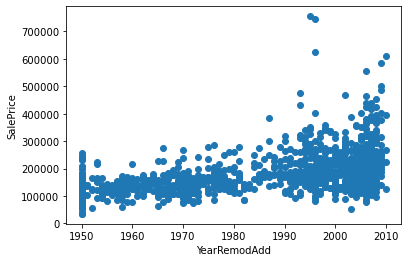

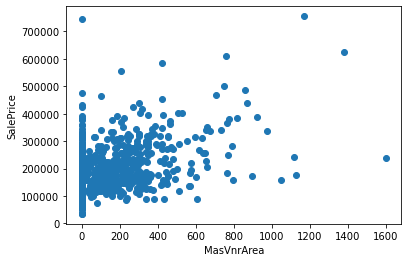

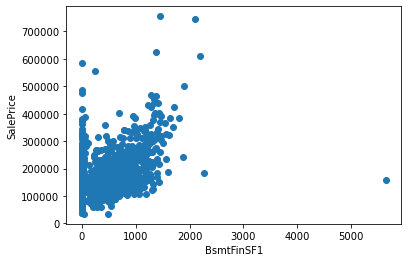

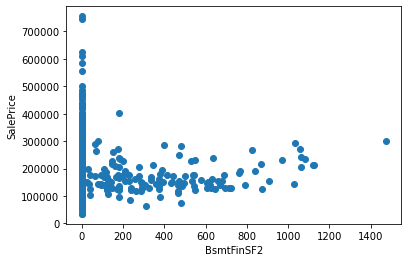

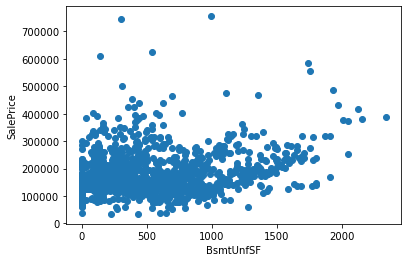

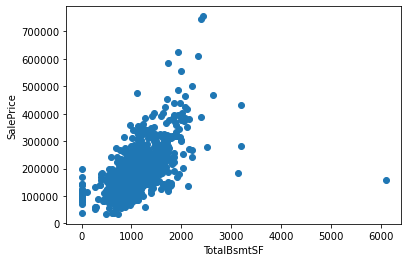

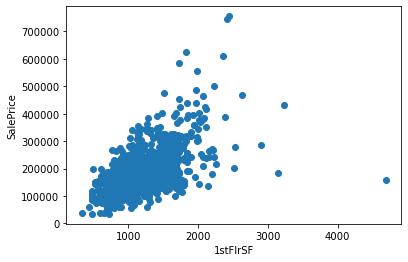

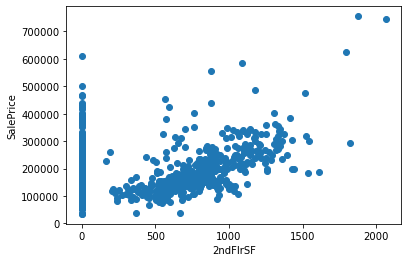

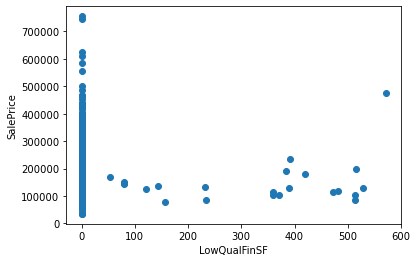

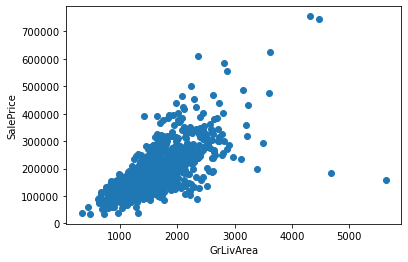

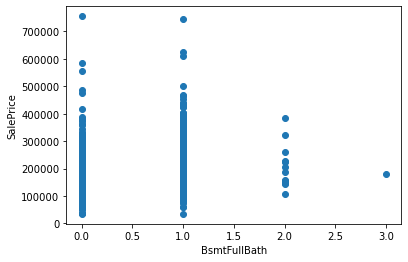

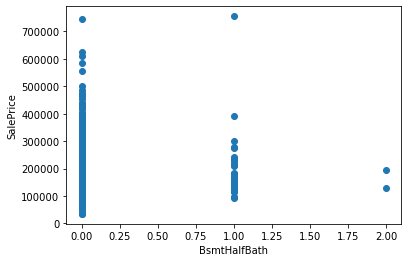

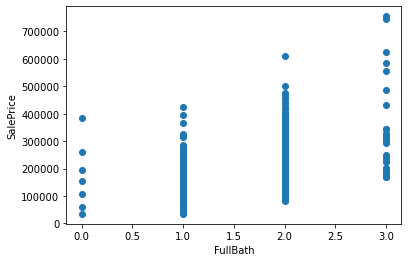

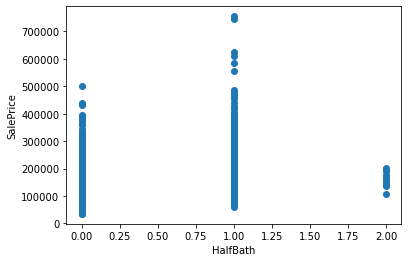

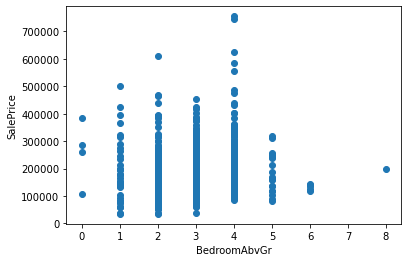

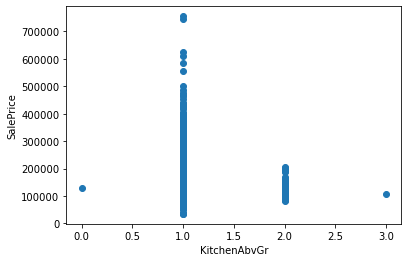

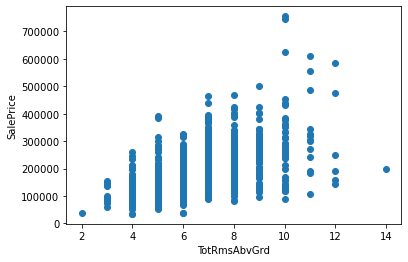

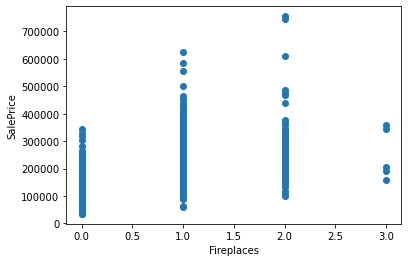

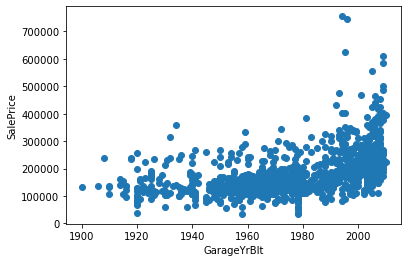

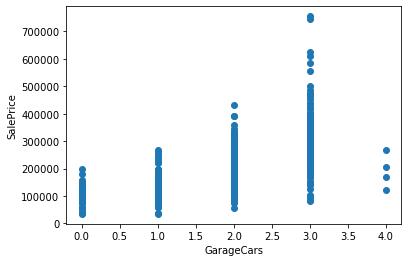

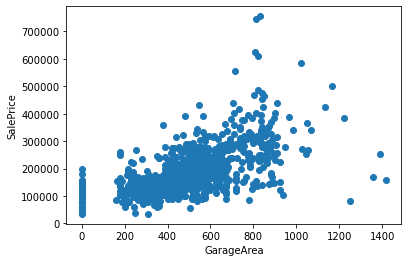

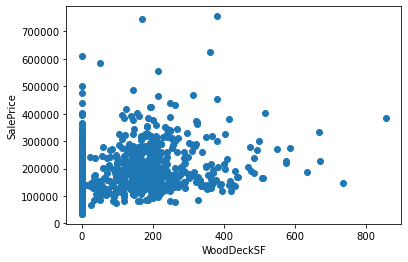

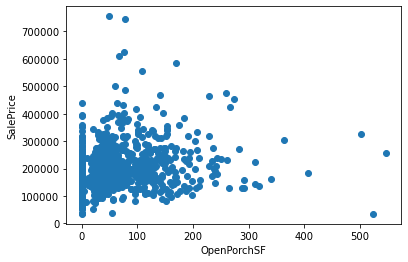

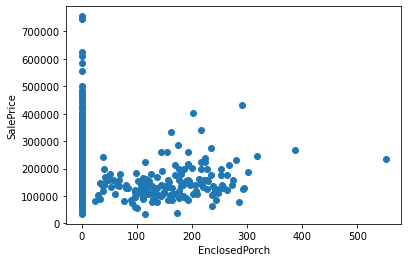

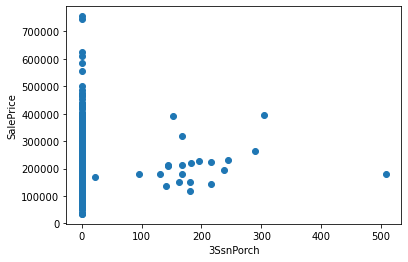

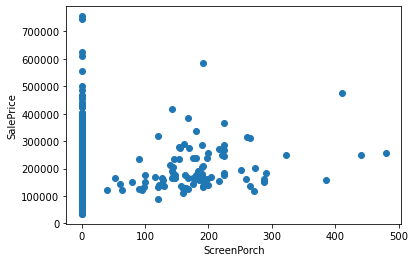

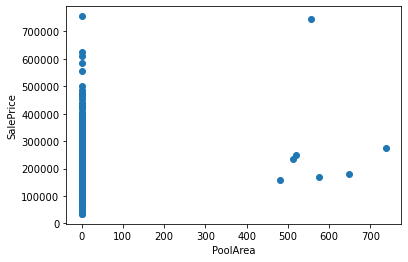

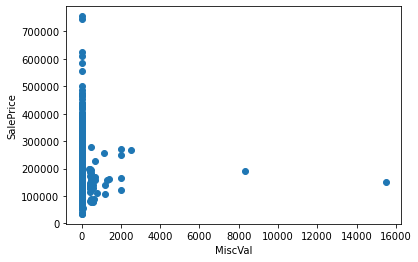

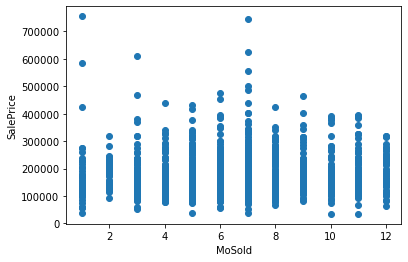

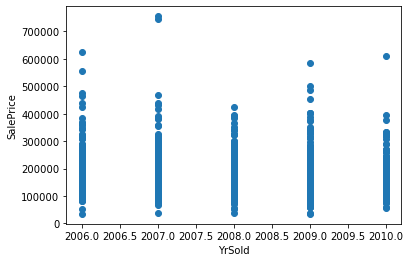

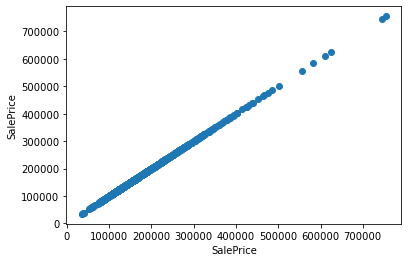

In [69]:
# Let's plot the Scatter plot between all feature variables and target variable:
for col in df_train.describe().columns:
    data=df_train.copy()
    plt.scatter(data[col],data['SalePrice'])
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.show()

In [70]:
#CHECKING MULTICOLLINIEARITY:
data_corr = df_train.corr()
data_corr['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.789185
GrLivArea        0.707300
GarageCars       0.628329
GarageArea       0.619000
TotalBsmtSF      0.595042
1stFlrSF         0.587642
FullBath         0.554988
TotRmsAbvGrd     0.528363
YearBuilt        0.514408
YearRemodAdd     0.507831
MasVnrArea       0.463626
Fireplaces       0.459611
GarageYrBlt      0.458007
BsmtFinSF1       0.362874
OpenPorchSF      0.339500
2ndFlrSF         0.330386
LotFrontage      0.323779
WoodDeckSF       0.315444
HalfBath         0.295592
LotArea          0.249499
BsmtUnfSF        0.215724
BsmtFullBath     0.212924
BedroomAbvGr     0.158281
PoolArea         0.103280
ScreenPorch      0.100284
MoSold           0.072764
3SsnPorch        0.060119
BsmtFinSF2      -0.010151
BsmtHalfBath    -0.011109
MiscVal         -0.013071
LowQualFinSF    -0.032381
YrSold          -0.045508
MSSubClass      -0.060775
OverallCond     -0.065642
EnclosedPorch   -0.115004
KitchenAbvGr    -0.132108
Name: SalePrice, dtype: float64

Text(0, 0.5, 'SalePrice')

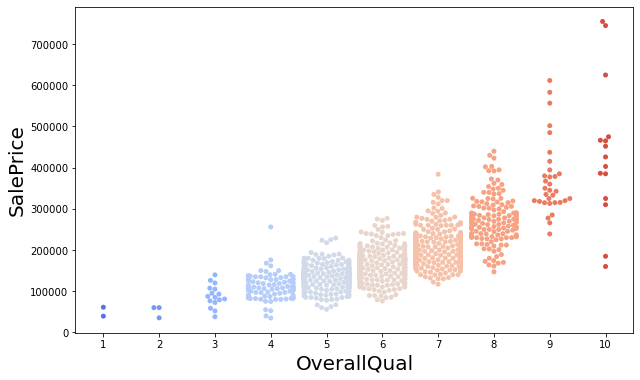

In [71]:
#Plotting OverallQual vs SalePrice:
plt.figure(figsize = (10,6))
sns.swarmplot(x = 'OverallQual',y = 'SalePrice', data = df_train, palette = 'coolwarm')
plt.xlabel('OverallQual', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)

Text(0, 0.5, 'SalePrice')

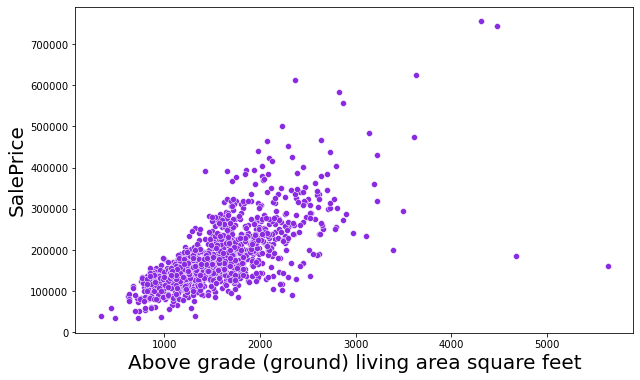

In [72]:
#Plotting GrLivArea vs SalePrice:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'GrLivArea',y = 'SalePrice', data = df_train, color = 'blueviolet')
plt.xlabel('Above grade (ground) living area square feet', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)

Text(0, 0.5, 'SalePrice')

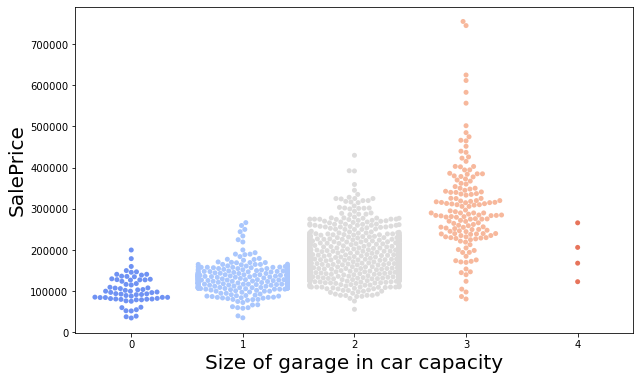

In [73]:
#Plotting GarageCars vs SalePrice:
plt.figure(figsize = (10,6))
sns.swarmplot(x = 'GarageCars',y = 'SalePrice', data = df_train, palette = 'coolwarm')
plt.xlabel('Size of garage in car capacity', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)

Text(0, 0.5, 'SalePrice')

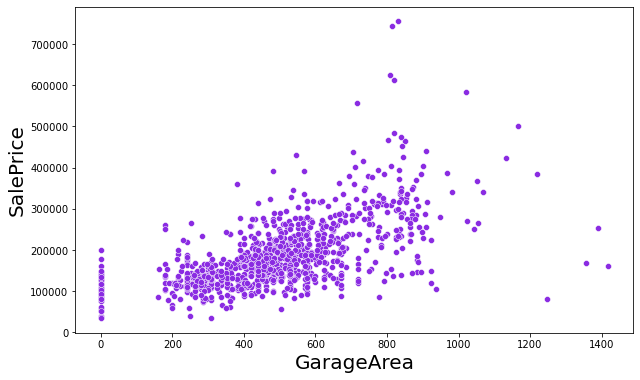

In [74]:
#Plotting GarageArea vs SalePrice:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'GarageArea',y = 'SalePrice', data = df_train, color = 'blueviolet')
plt.xlabel('GarageArea', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)

Text(0, 0.5, 'SalePrice')

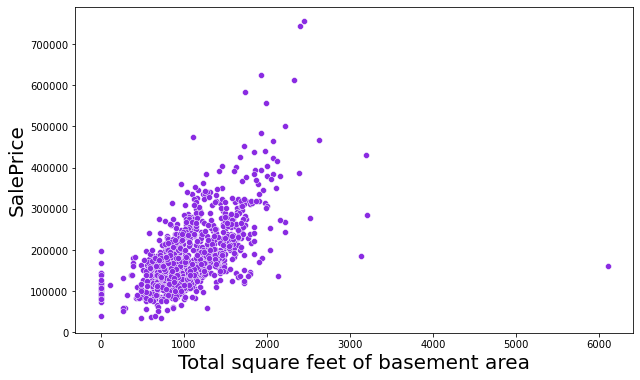

In [75]:
#Plotting TotalBsmtSF vs SalePrice:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'TotalBsmtSF',y = 'SalePrice', data = df_train, color = 'blueviolet')
plt.xlabel('Total square feet of basement area', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)

Text(0, 0.5, 'SalePrice')

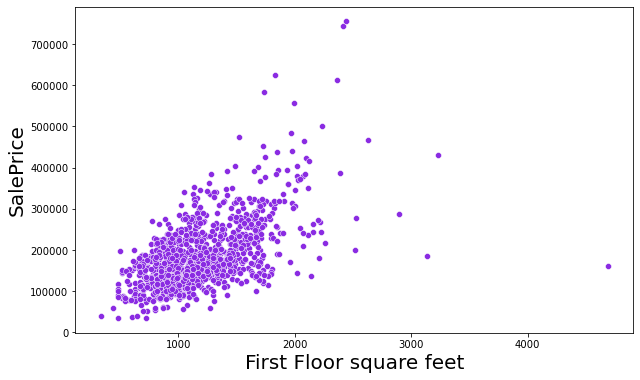

In [76]:
#Plotting 1stFlrSF vs SalePrice:
plt.figure(figsize = (10,6))
sns.scatterplot(x = '1stFlrSF',y = 'SalePrice', data = df_train, color = 'blueviolet')
plt.xlabel('First Floor square feet', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)

Text(0, 0.5, 'SalePrice')

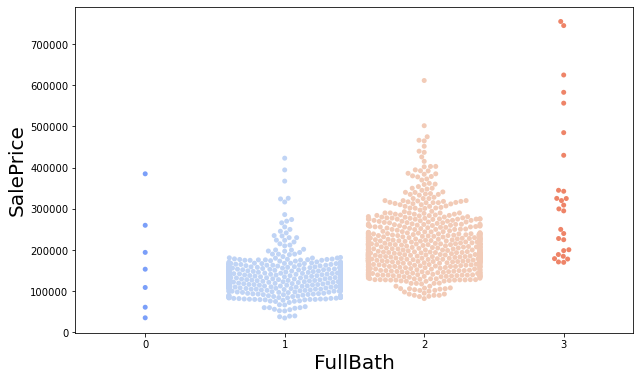

In [77]:
#Plotting FullBath vs SalePrice:
plt.figure(figsize = (10,6))
sns.swarmplot(x = 'FullBath',y = 'SalePrice', data = df_train, palette = 'coolwarm')
plt.xlabel('FullBath', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)

Text(0, 0.5, 'SalePrice')

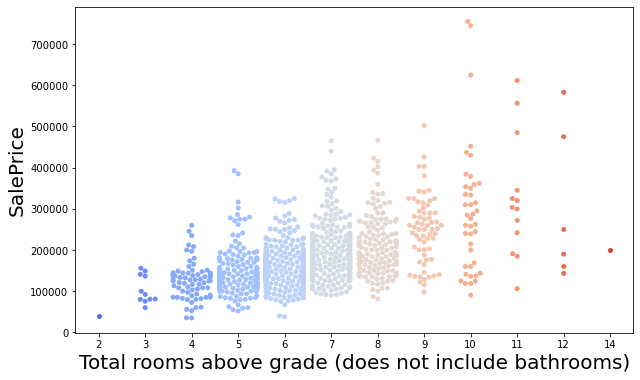

In [78]:
#Plotting TotRmsAbvGrd vs SalePrice:
plt.figure(figsize = (10,6))
sns.swarmplot(x = 'TotRmsAbvGrd',y = 'SalePrice', data = df_train, palette = 'coolwarm')
plt.xlabel('Total rooms above grade (does not include bathrooms)', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)

Text(0, 0.5, 'SalePrice')

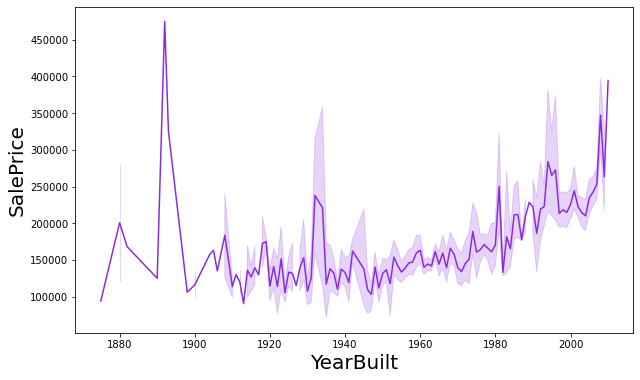

In [79]:
#Plotting YearBuilt vs SalePrice:
plt.figure(figsize = (10,6))
sns.lineplot(x = 'YearBuilt',y = 'SalePrice', data = df_train, color = 'blueviolet')
plt.xlabel('YearBuilt', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)

Text(0, 0.5, 'SalePrice')

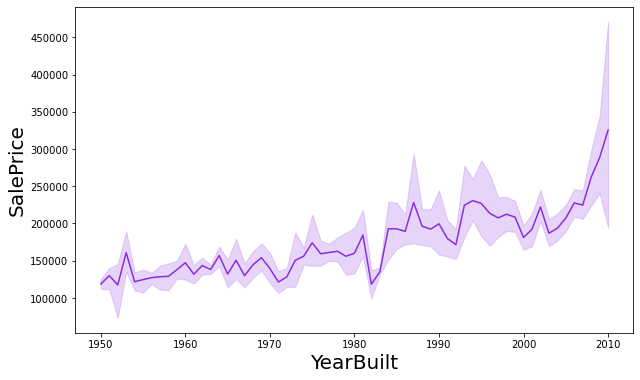

In [80]:
#Plotting YearRemodAdd vs SalePrice:
plt.figure(figsize = (10,6))
sns.lineplot(x = 'YearRemodAdd',y = 'SalePrice', data = df_train, color = 'blueviolet')
plt.xlabel('YearBuilt', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)

Text(0, 0.5, 'SalePrice')

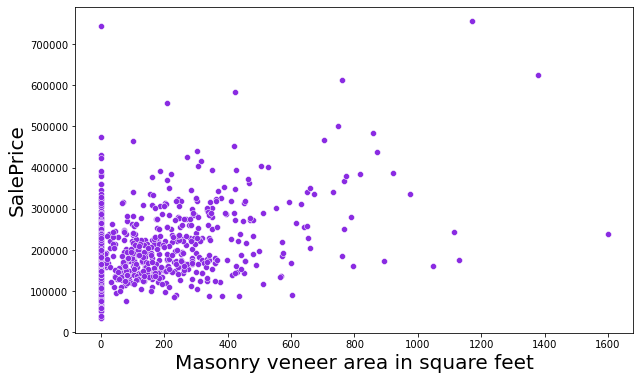

In [81]:
#Plotting MasVnrArea vs SalePrice:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'MasVnrArea',y = 'SalePrice', data = df_train, color = 'blueviolet')
plt.xlabel('Masonry veneer area in square feet', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)

Text(0, 0.5, 'SalePrice')

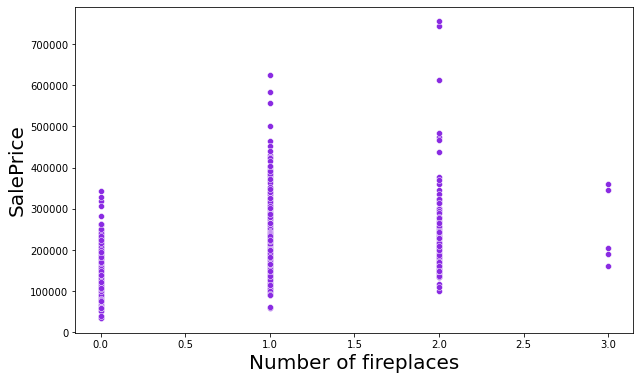

In [82]:
#Plotting Fireplaces vs SalePrice:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'Fireplaces',y = 'SalePrice', data = df_train, color = 'blueviolet')
plt.xlabel('Number of fireplaces', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)

Text(0, 0.5, 'SalePrice')

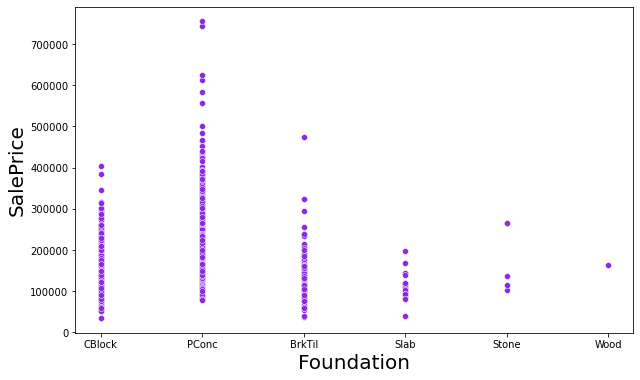

In [83]:
#Plotting Foundation vs SalePrice:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'Foundation',y = 'SalePrice', data = df_train, color = 'blueviolet')
plt.xlabel('Foundation', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)

Text(0, 0.5, 'SalePrice')

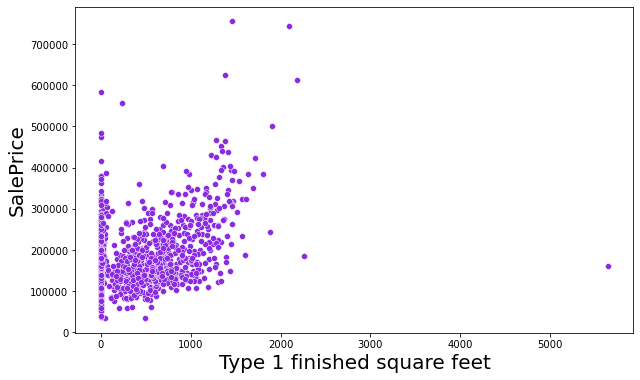

In [84]:
#Plotting BsmtFinSF1 vs SalePrice:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'BsmtFinSF1',y = 'SalePrice', data = df_train, color = 'blueviolet')
plt.xlabel('Type 1 finished square feet', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)

Text(0, 0.5, 'SalePrice')

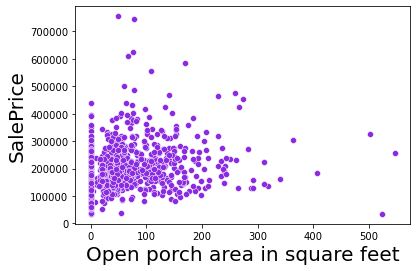

In [85]:
#Plotting OpenPorchSF vs SalePrice:plt.figure(figsize = (10,6))
sns.scatterplot(x = 'OpenPorchSF',y = 'SalePrice', data = df_train, color = 'blueviolet')
plt.xlabel('Open porch area in square feet', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)

Text(0, 0.5, 'SalePrice')

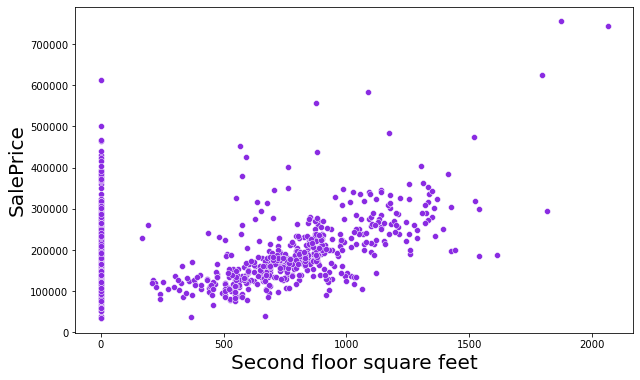

In [86]:
#Plotting 2ndFlrSF vs SalePrice:plt.figure(figsize = (10,6))
plt.figure(figsize = (10,6))
sns.scatterplot(x = '2ndFlrSF',y = 'SalePrice', data = df_train, color = 'blueviolet')
plt.xlabel('Second floor square feet', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)

Text(0, 0.5, 'SalePrice')

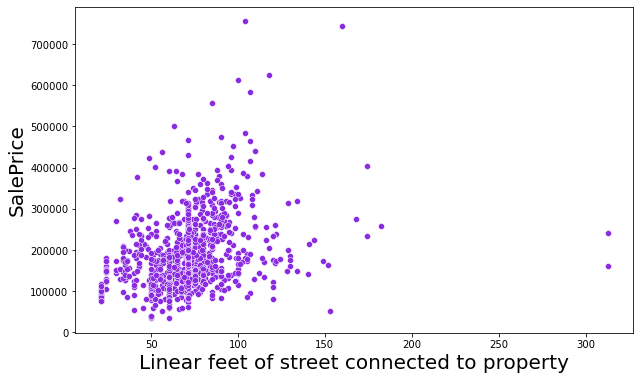

In [87]:
#Plotting LotFrontage vs SalePrice:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'LotFrontage',y = 'SalePrice', data = df_train, color = 'blueviolet')
plt.xlabel('Linear feet of street connected to property', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)

Text(0, 0.5, 'SalePrice')

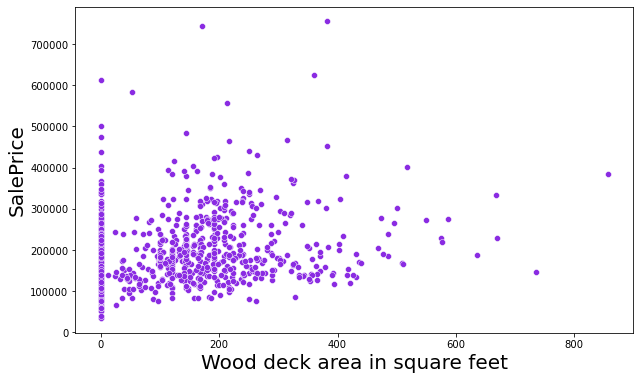

In [88]:
#Plotting WoodDeckSF vs SalePrice:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'WoodDeckSF',y = 'SalePrice', data = df_train, color = 'blueviolet')
plt.xlabel('Wood deck area in square feet', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)

Text(0, 0.5, 'SalePrice')

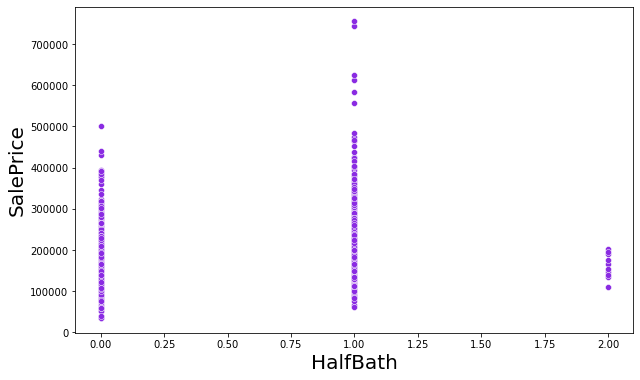

In [89]:
#Plotting HalfBath vs SalePrice:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'HalfBath',y = 'SalePrice', data = df_train, color = 'blueviolet')
plt.xlabel('HalfBath', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)

(1900.0, 2020.0)

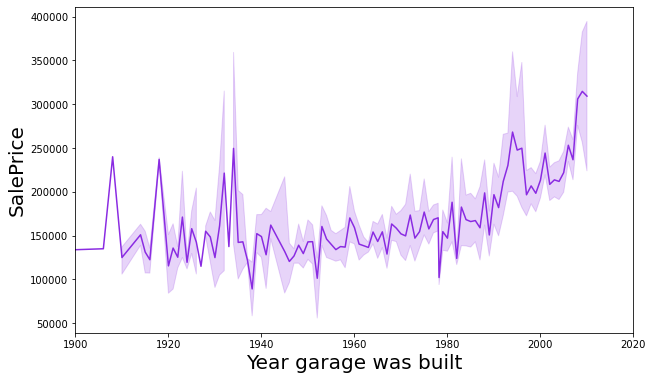

In [90]:
#Plotting GarageYrBlt vs SalePrice:
plt.figure(figsize = (10,6))
sns.lineplot(x = 'GarageYrBlt',y = 'SalePrice', data = df_train, color = 'blueviolet')
plt.xlabel('Year garage was built', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)
plt.xlim([1900,2020])

Text(0, 0.5, 'SalePrice')

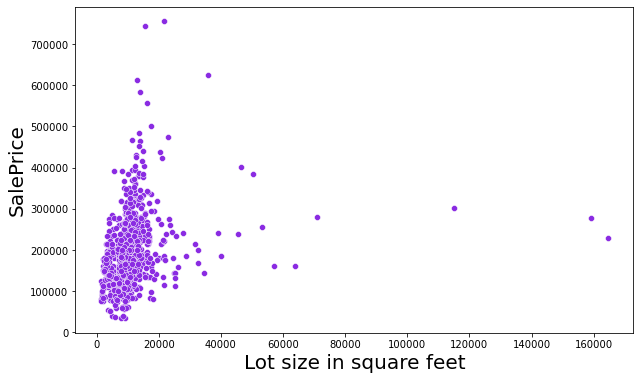

In [91]:
#Plotting LotArea vs SalePrice:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'LotArea',y = 'SalePrice', data = df_train, color = 'blueviolet')
plt.xlabel('Lot size in square feet', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)

Text(0, 0.5, 'SalePrice')

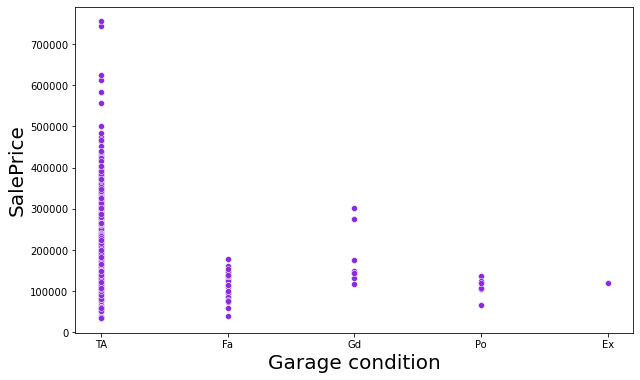

In [92]:
#Plotting GarageCond vs SalePrice:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'GarageCond',y = 'SalePrice', data = df_train, color = 'blueviolet')
plt.xlabel('Garage condition', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)

Text(0, 0.5, 'SalePrice')

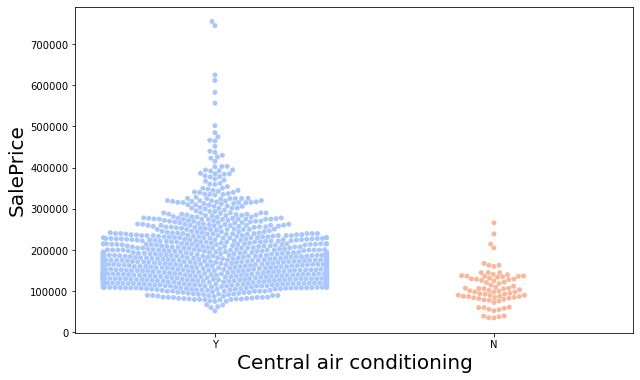

In [93]:
#Plotting CentralAir vs SalePrice:
plt.figure(figsize = (10,6))
sns.swarmplot(x = 'CentralAir',y = 'SalePrice', data = df_train, palette = 'coolwarm')
plt.xlabel('Central air conditioning', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)

Text(0, 0.5, 'SalePrice')

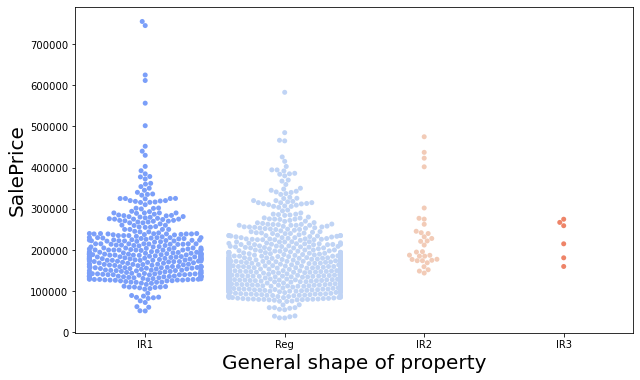

In [94]:
#Plotting LotShape vs SalePrice:
plt.figure(figsize = (10,6))
sns.swarmplot(x = 'LotShape',y = 'SalePrice', data = df_train, palette = 'coolwarm')
plt.xlabel('General shape of property', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)

Text(0, 0.5, 'SalePrice')

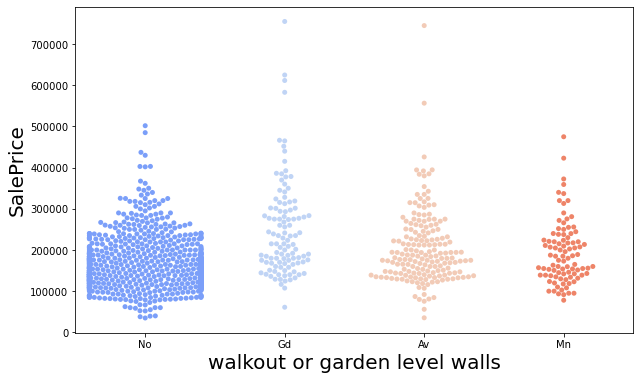

In [95]:
#Plotting BsmtExposure vs SalePrice:
plt.figure(figsize = (10,6))
sns.swarmplot(x = 'BsmtExposure',y = 'SalePrice', data = df_train, palette = 'coolwarm')
plt.xlabel('walkout or garden level walls', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)

Text(0, 0.5, 'SalePrice')

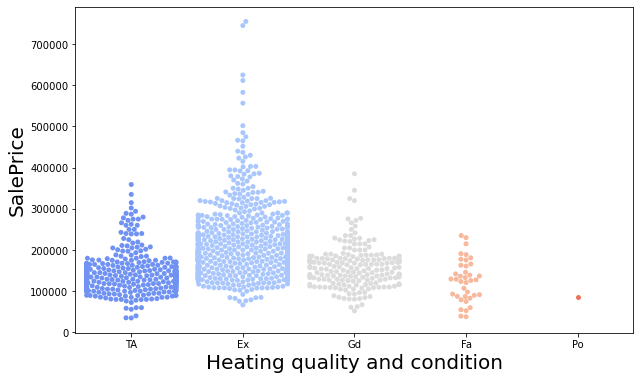

In [96]:
#Plotting HeatingQC vs SalePrice:
plt.figure(figsize = (10,6))
sns.swarmplot(x = 'HeatingQC',y = 'SalePrice', data = df_train, palette = 'coolwarm')
plt.xlabel('Heating quality and condition', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)

Text(0, 0.5, 'SalePrice')

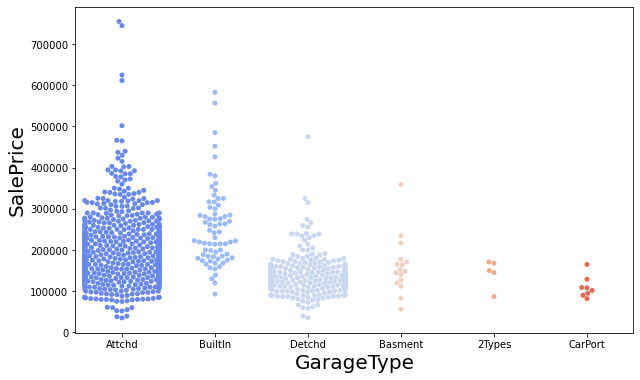

In [97]:
#Plotting GarageType vs SalePrice:
plt.figure(figsize = (10,6))
sns.swarmplot(x = 'GarageType',y = 'SalePrice', data = df_train, palette = 'coolwarm')
plt.xlabel('GarageType', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)

Text(0, 0.5, 'SalePrice')

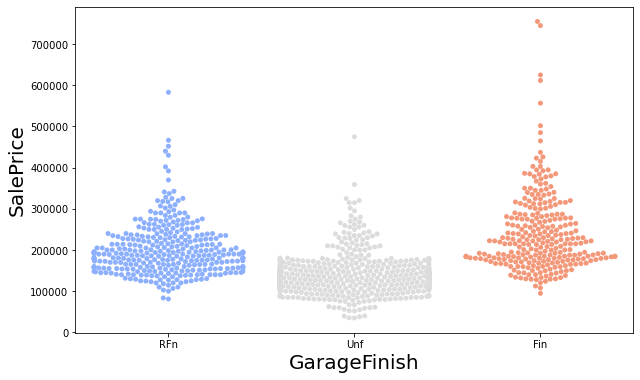

In [98]:
#Plotting GarageFinish vs SalePrice:
plt.figure(figsize = (10,6))
sns.swarmplot(x = 'GarageFinish',y = 'SalePrice', data = df_train, palette = 'coolwarm')
plt.xlabel('GarageFinish', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)

Text(0, 0.5, 'SalePrice')

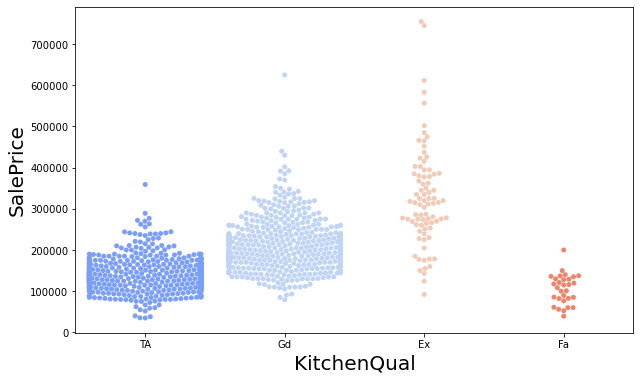

In [99]:
#Plotting KitchenQual vs SalePrice:
plt.figure(figsize = (10,6))
sns.swarmplot(x = 'KitchenQual',y = 'SalePrice', data = df_train, palette = 'coolwarm')
plt.xlabel('KitchenQual', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)

Text(0, 0.5, 'SalePrice')

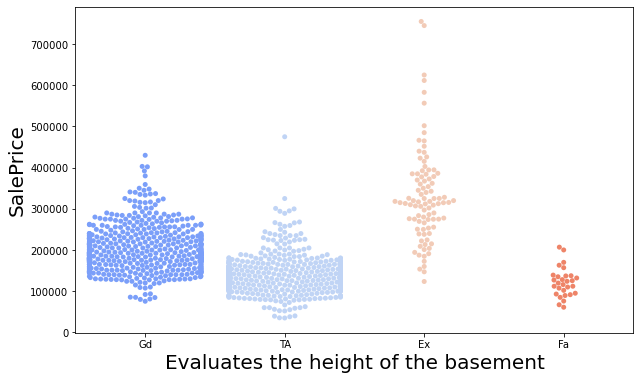

In [100]:
#Plotting BsmtQual vs SalePrice:
plt.figure(figsize = (10,6))
sns.swarmplot(x = 'BsmtQual',y = 'SalePrice', data = df_train, palette = 'coolwarm')
plt.xlabel('Evaluates the height of the basement', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)

Text(0, 0.5, 'SalePrice')

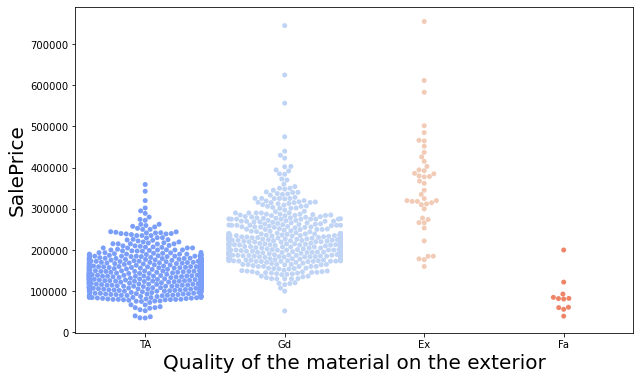

In [101]:
#Plotting ExterQualvs SalePrice:
plt.figure(figsize = (10,6))
sns.swarmplot(x = 'ExterQual',y = 'SalePrice', data = df_train, palette = 'coolwarm')
plt.xlabel('Quality of the material on the exterior', fontsize = 20)
plt.ylabel('SalePrice', fontsize = 20)

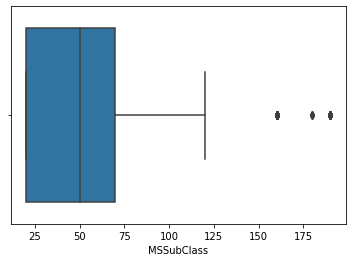

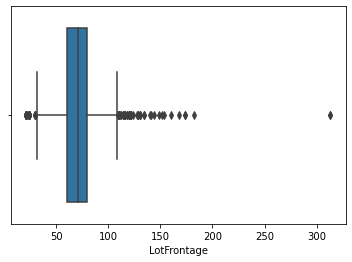

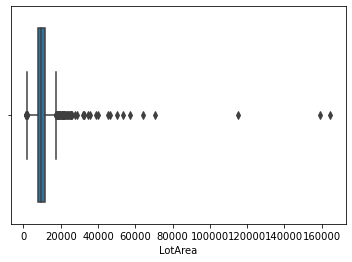

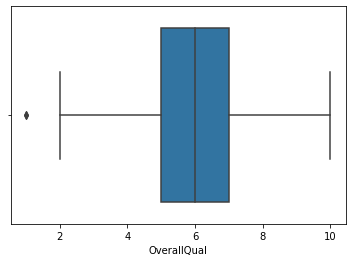

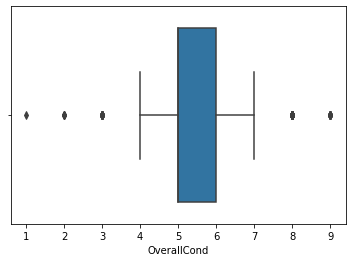

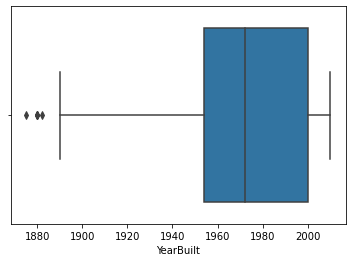

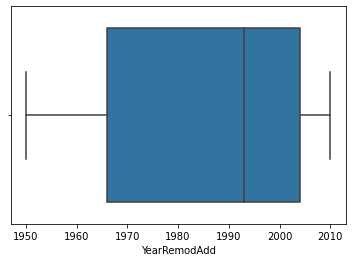

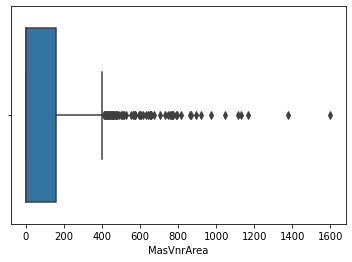

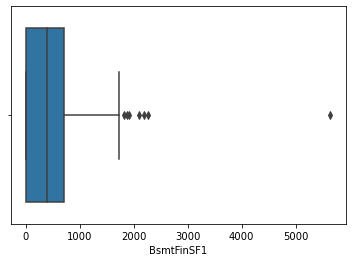

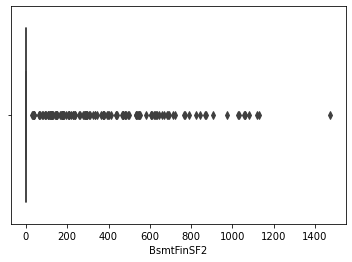

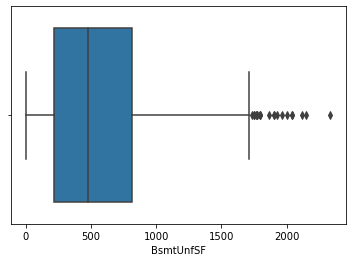

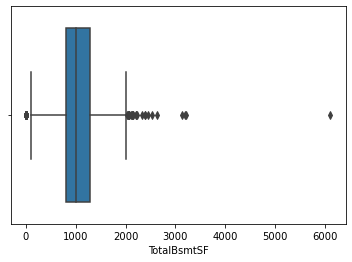

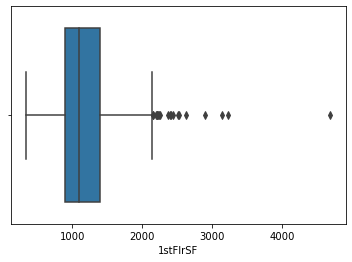

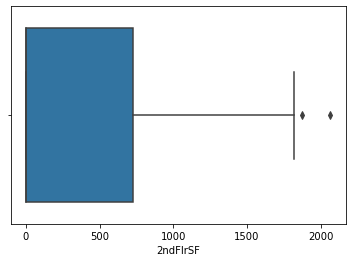

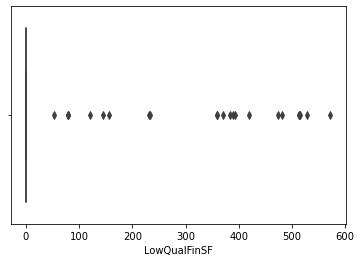

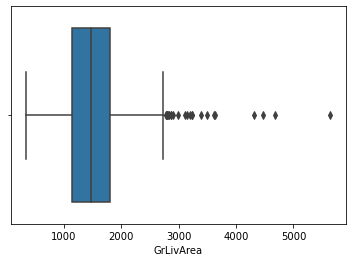

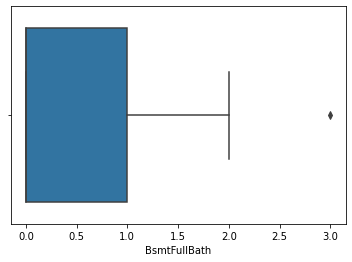

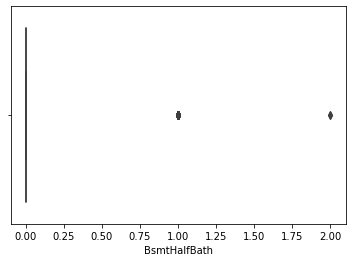

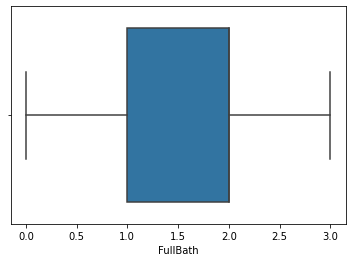

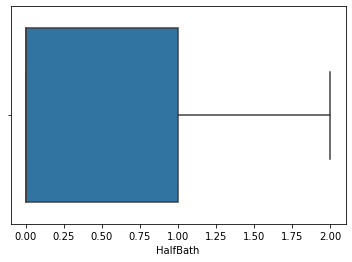

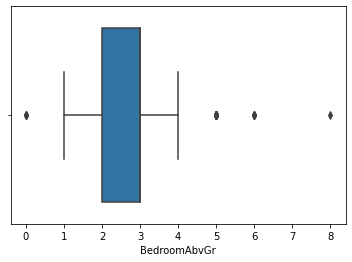

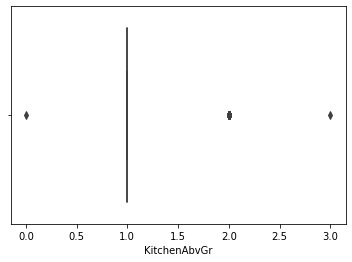

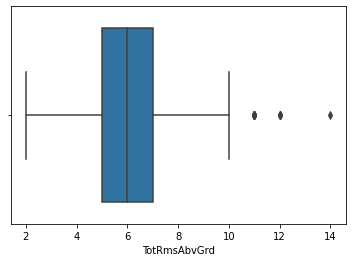

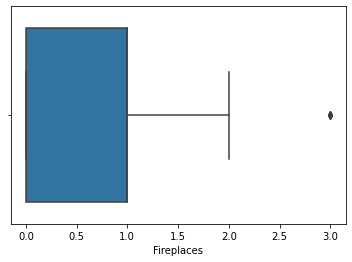

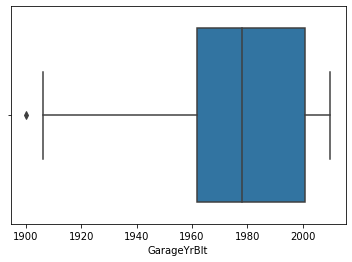

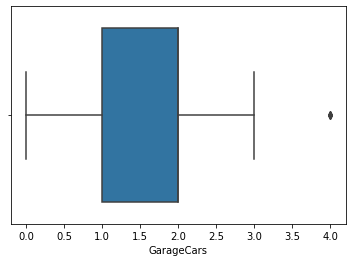

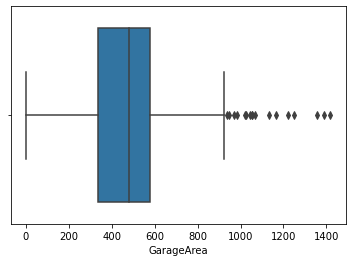

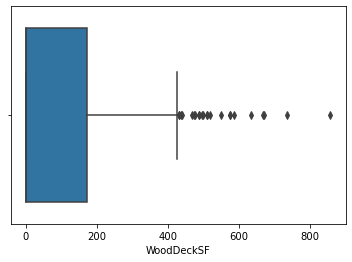

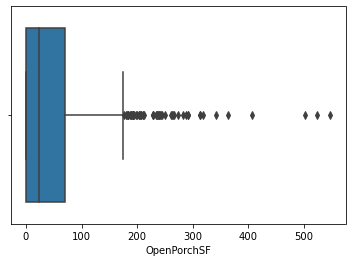

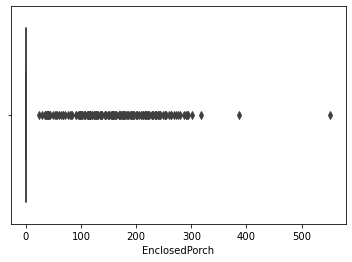

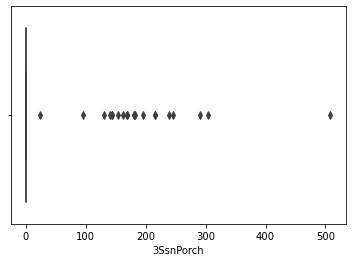

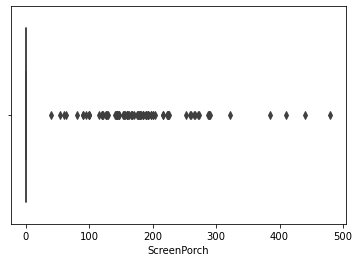

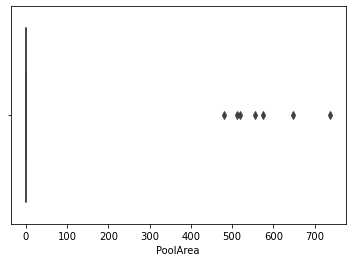

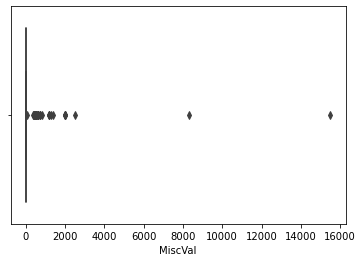

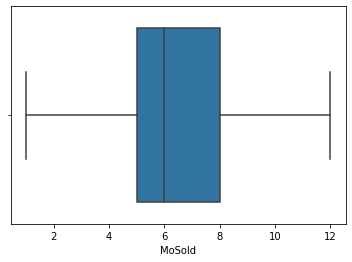

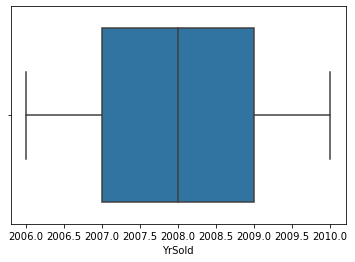

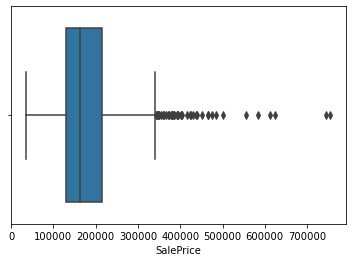

In [102]:
#Checking for outliers by using boxplot:
for i in df_train.columns:
    if df_train[i].dtypes!=object:
        sns.boxplot(df_train[i])
        plt.show()

We can see that most of the features is having outliers,we will remove the outliers latter.

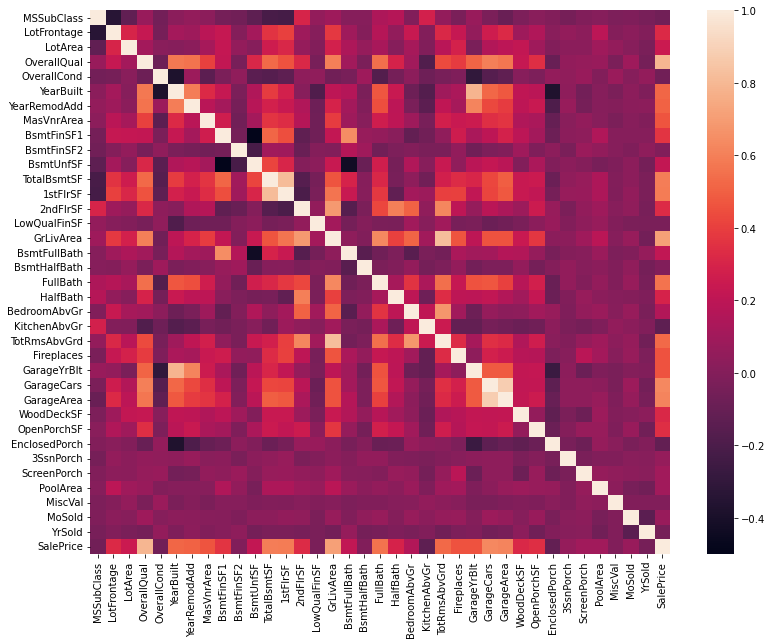

In [103]:
# correlation matrix heatmap
plt.figure(figsize=(13,10))
sns.heatmap(df_train.corr())
plt.show()

Top 10 features highly co-related with the target feature:

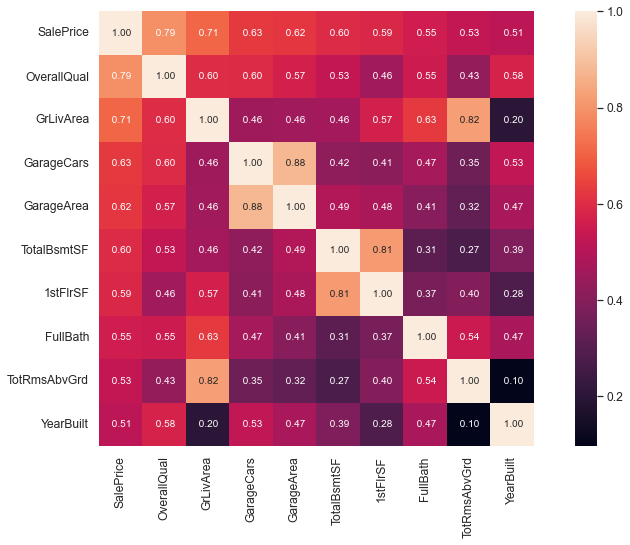

In [104]:
# top 10
plt.figure(figsize=(15,8))
k = 10
cols = df_train.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt=' .2f', annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [105]:
#lets check for skewness
df_train.skew()

MSSubClass        1.422019
LotFrontage       2.710383
LotArea          10.659285
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.495864
MasVnrArea        2.834658
BsmtFinSF1        1.871606
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
1stFlrSF          1.513707
2ndFlrSF          0.823479
LowQualFinSF      8.666142
GrLivArea         1.449952
BsmtFullBath      0.627106
BsmtHalfBath      4.264403
FullBath          0.057809
HalfBath          0.656492
BedroomAbvGr      0.243855
KitchenAbvGr      4.365259
TotRmsAbvGrd      0.644657
Fireplaces        0.671966
GarageYrBlt      -0.662934
GarageCars       -0.358556
GarageArea        0.189665
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
3SsnPorch         9.770611
ScreenPorch       4.105741
PoolArea         13.243711
MiscVal          23.065943
MoSold            0.220979
YrSold            0.115765
SalePrice         1.953878
d

In [106]:
numerical_feature=[feature for feature in df_train.columns if feature not in categorical_features]
print("Numerical Feature Count",len(numerical_feature))

Numerical Feature Count 37


Outlier Removal:

In [107]:
#There is lot of skewness in the data. Lets treat them

for col in df_train[numerical_feature].columns:
    if df_train.skew().loc[col]>0.55 and col!='SalePrice':
        df_train[col]=np.log1p(df_train[col])

In [108]:
df_train.skew()

MSSubClass        0.235373
LotFrontage      -0.815665
LotArea          -0.169107
OverallQual       0.175082
OverallCond      -0.418916
YearBuilt        -0.579204
YearRemodAdd     -0.495864
MasVnrArea        0.494344
BsmtFinSF1       -0.606859
BsmtFinSF2        2.502785
BsmtUnfSF        -2.129882
TotalBsmtSF      -5.146574
1stFlrSF          0.105795
2ndFlrSF          0.289335
LowQualFinSF      7.090715
GrLivArea         0.001448
BsmtFullBath      0.430791
BsmtHalfBath      4.049438
FullBath          0.057809
HalfBath          0.543681
BedroomAbvGr      0.243855
KitchenAbvGr      3.678394
TotRmsAbvGrd     -0.071926
Fireplaces        0.188280
GarageYrBlt      -0.662934
GarageCars       -0.358556
GarageArea        0.189665
WoodDeckSF        0.131075
OpenPorchSF      -0.004279
EnclosedPorch     2.079610
3SsnPorch         7.196594
ScreenPorch       3.104665
PoolArea         12.826713
MiscVal           5.159109
MoSold            0.220979
YrSold            0.115765
SalePrice         1.953878
d

Encoding the categorical features with label encoder:

In [109]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categorical_features:
    df_train[i]=le.fit_transform(df_train[i])

In [110]:
df_train

MSSubClass  MSZoning  LotFrontage    LotArea  Street  LotShape  \
0       4.795791         3     4.276506   8.502891       1         0   
1       3.044522         3     4.564348   9.671934       1         0   
2       4.110874         3     4.532599   9.202409       1         0   
3       3.044522         3     4.663439   9.371779       1         0   
4       3.044522         3     4.276506   9.719324       1         0   
5       4.110874         3     4.077537   9.550733       1         0   
6       3.044522         3     4.276506   9.336268       1         0   
7       3.044522         3     4.488636   9.482350       1         3   
8       3.044522         3     4.262680   9.123802       1         3   
9       3.931826         3     4.394449   9.045584       1         3   
10      3.931826         4     3.931826   9.059634       1         3   
11      4.110874         3     3.806662   9.164192       1         0   
12      3.044522         3     4.867534   9.126633       1         0   
13      3.044522         3     4.394449   9.093020       1         0   
14      3.931826         3     4.094345   9.709114       1         0   
15      4.262680         3     4.025352   9.267949       1         3   
16      3.433987         4     4.276506   8.681181       1         3   
17      3.044522         3     4.174387   8.897682       1         3   
18      3.044522         3     4.276506   8.976894       1         0   
19      5.081404         4     3.218876   7.609367       1         3   
20      4.110874         3     4.394449   9.428351       1         3   
21      4.454347         3     4.262680   9.041448       1         3   
22      3.044522         3     4.234107   9.181735       1         3   
23      3.044522         3     4.276506   9.274254       1         0   
24      3.044522         3     4.276666   9.130323       1         3   
25      3.044522         3     4.276506   9.952325       1         3   
26      3.433987         3     4.276506  10.140139       1         3   
27      3.044522         3     4.488636   9.340930       1         3   
28      3.828641         4     4.077537   8.761080       1         3   
29      4.262680         3     4.317488   9.391745       1         0   
30      4.795791         3     4.127134   8.943637       1         3   
31      4.110874         4     4.110874   8.125335       1         3   
32      4.510860         3     4.276506   9.846441       1         0   
33      3.931826         4     4.276506   9.422140       1         0   
34      4.110874         3     4.276506   9.599879       1         1   
35      3.044522         3     4.795791   9.245418       1         3   
36      3.044522         3     4.394449   9.249657       1         3   
37      3.044522         3     4.442651   9.442721       1         3   
38      4.454347         3     4.276506   8.928110       1         0   
39      3.713572         4     3.931826   9.116140       1         3   
40      3.044522         3     4.955827  10.366309       1         0   
41      3.044522         3     4.262680   9.495594       1         3   
42      5.081404         1     3.433987   8.064951       1         3   
43      5.081404         4     3.218876   7.833204       1         3   
44      4.394449         3     4.189655   9.034319       1         3   
45      3.044522         3     4.343805   9.025816       1         3   
46      4.110874         3     4.110874   9.002578       1         0   
47      3.044522         4     4.615121   9.392745       1         3   
48      3.044522         3     3.931826   8.517393       1         3   
49      3.044522         3     4.262680   8.978660       1         3   
50      3.044522         3     4.454347   9.570250       1         3   
51      3.931826         4     4.110874   9.253496       1         3   
52      3.433987         3     4.110874   9.036106       1         3   
53      3.044522         3     4.174387   9.072571       1         0   
54      3.044522         3     4.110874   9.31

Again Checking for outliers:

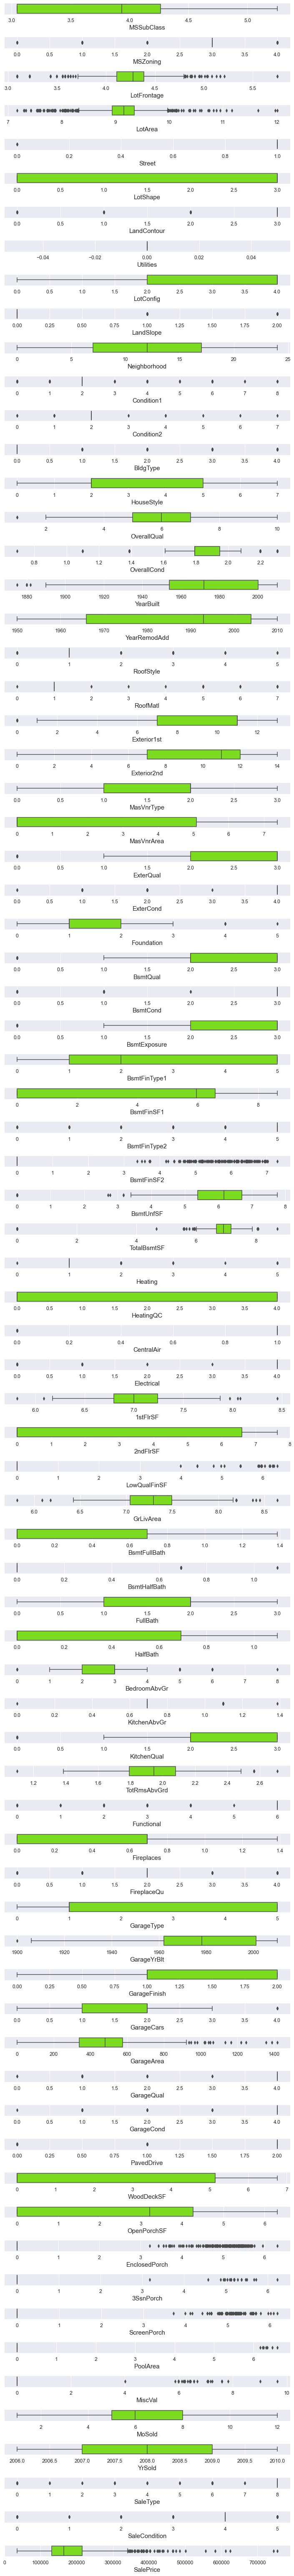

In [111]:
plt.figure(figsize = (10,90))
pltnum = 1
for i in df_train:
    if pltnum <= 80:
        plt.subplot(80,1, pltnum)
        sns.boxplot(df_train[i], color = 'lawngreen')
        plt.xlabel(i, fontsize = 15)
    pltnum+=1
plt.tight_layout()

# Checking normal distribution of the features: :

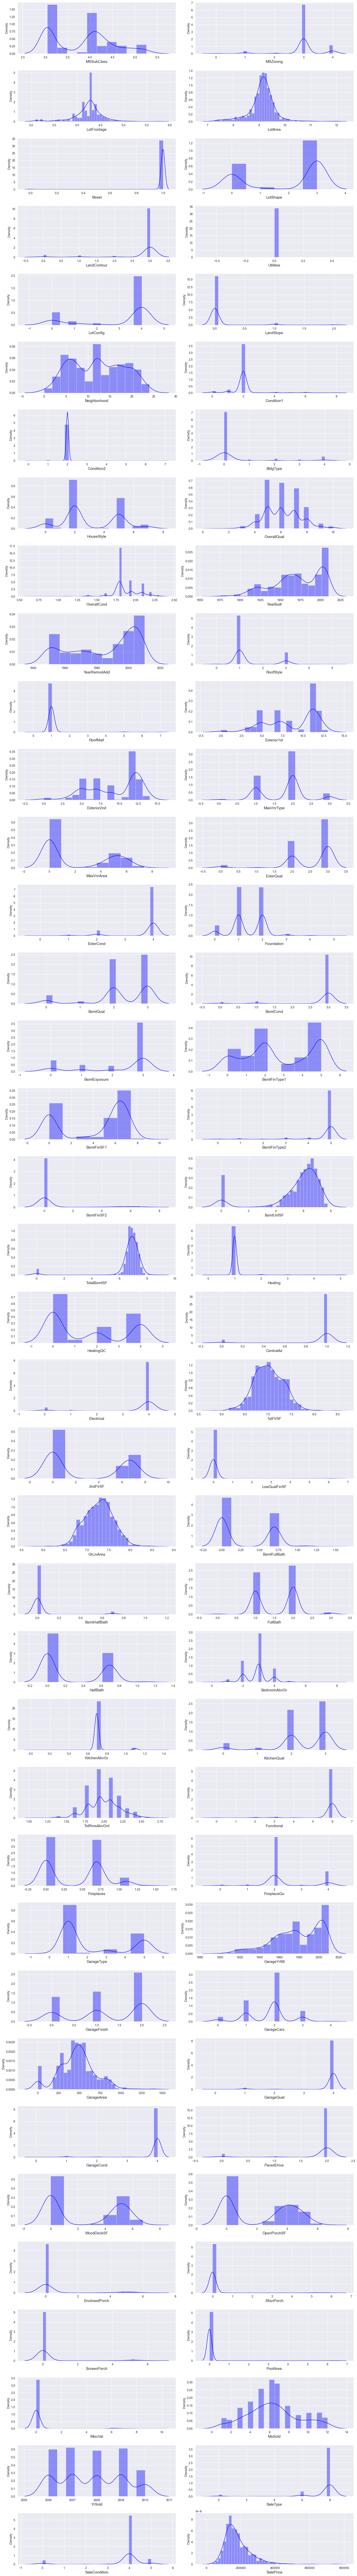

In [112]:
plt.figure(figsize = (20,150))
pltnum = 1
for i in df_train:
    if pltnum <= 80:
        plt.subplot(40,2, pltnum)
        sns.distplot(df_train[i], color = 'blue')
        plt.xlabel(i, fontsize = 15)
    pltnum+=1
plt.tight_layout()

I can see that the outliers are under control for most of the variable, However the variables 'MiscVal','PoolArea','ScreenPorch','3SsnPorch','EnclosedPorch','BsmtFinSF2' and 'Exterior2nd' has lot of outliers and will not be helpful in the price prediction,so dropping this columns.

In [113]:
df_train = df_train.drop(columns = ['MiscVal','PoolArea','ScreenPorch','3SsnPorch','EnclosedPorch','BsmtFinSF2','Exterior2nd'])


Separating the features and target variable:

In [114]:
x = df_train.drop('SalePrice', axis=1)
y = df_train['SalePrice']

Selecting Best features:

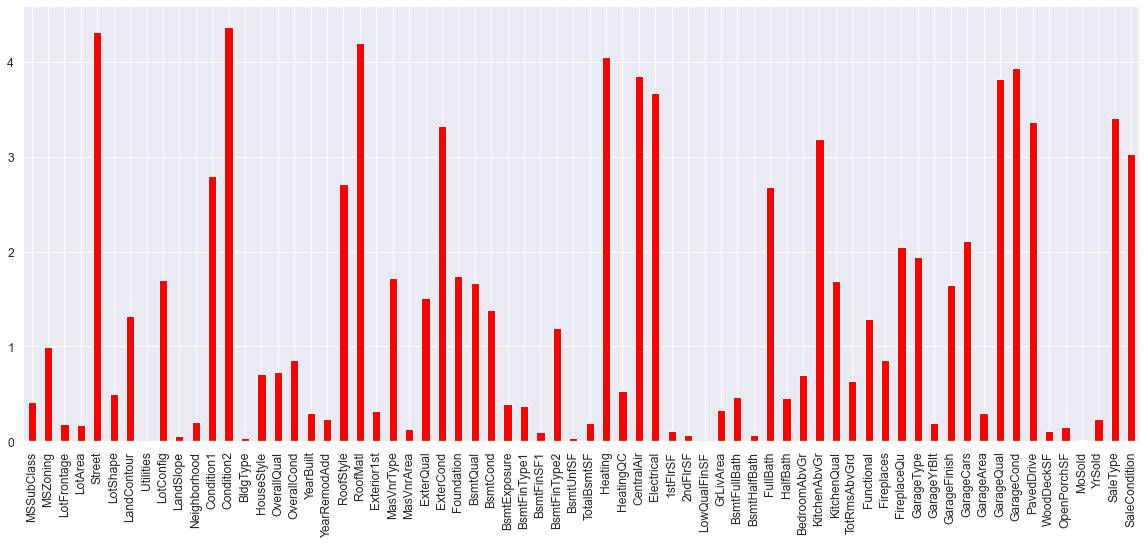

In [117]:
#importing library
from sklearn.feature_selection import mutual_info_classif

plt.figure(figsize=(20,8))
importance = mutual_info_classif(x,y)
feat_importance = pd.Series(importance, df_train.columns[0:len(df_train.columns)-1])
feat_importance.plot(kind='bar', color='red')
plt.show()

In [118]:
# creating a dataframe of the important feature by feature importance
feat_importance_table = pd.DataFrame({'Importance':feat_importance})
pd.set_option('display.max_rows', 80)
feat_importance_table.sort_values(by='Importance', ascending=False)

Importance
Condition2       4.368607
Street           4.315512
RoofMatl         4.199497
Heating          4.054030
GarageCond       3.936004
CentralAir       3.849224
GarageQual       3.817656
Electrical       3.673040
SaleType         3.404391
PavedDrive       3.362457
ExterCond        3.320815
KitchenAbvGr     3.191133
SaleCondition    3.026598
Condition1       2.791897
RoofStyle        2.710738
FullBath         2.676529
GarageCars       2.115081
FireplaceQu      2.043683
GarageType       1.940215
Foundation       1.744362
MasVnrType       1.719337
LotConfig        1.704057
KitchenQual      1.692070
BsmtQual         1.668601
GarageFinish     1.649548
ExterQual        1.514602
BsmtCond         1.384855
LandContour      1.321641
Functional       1.287214
BsmtFinType2     1.196984
MSZoning         0.988148
Fireplaces       0.854457
OverallCond      0.852579
OverallQual      0.731864
HouseStyle       0.704801
BedroomAbvGr     0.693892
TotRmsAbvGrd     0.635261
HeatingQC        0.531800
LotShape         0.500840
BsmtFullBath     0.463090
HalfBath         0.456766
MSSubClass       0.418427
BsmtExposure     0.388368
BsmtFinType1     0.368094
GrLivArea        0.333513
Exterior1st      0.323276
GarageArea       0.294522
YearBuilt        0.292630
YrSold           0.236746
YearRemodAdd     0.229339
Neighborhood     0.201971
TotalBsmtSF      0.190955
GarageYrBlt      0.190760
LotFrontage      0.181923
LotArea          0.166906
OpenPorchSF      0.145272
MasVnrArea       0.125472
WoodDeckSF       0.108067
1stFlrSF         0.105326
BsmtFinSF1       0.093289
2ndFlrSF         0.066989
BsmtHalfBath     0.060361
LandSlope        0.054319
BsmtUnfSF        0.038462
BldgType         0.037611
MoSold           0.007610
LowQualFinSF     0.000000
Utilities        0.000000

In [119]:
# creating a new dataframe with only those features which has importance greater than 1.

df_new = df_train[['Street', 'Condition2', 'GarageCond', 'Heating', 'KitchenAbvGr', 'CentralAir', 'GarageQual', 'PavedDrive',
             'Electrical', 'SaleType', 'SaleCondition', 'ExterCond', 'Condition1', 'FullBath', 'RoofStyle', 'GarageCars',
             'MasVnrType', 'GarageType' , 'LotConfig', 'Functional', 'GarageFinish', 'Foundation', 'BsmtCond', 'ExterQual',
             'BsmtQual', 'KitchenQual', 'LandContour', 'BsmtFinType2', 'SalePrice']]


In [120]:
#Standardizaton with StandardScaler()
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x

MSSubClass  MSZoning  LotFrontage   LotArea  Street  LotShape  \
0       4.795791         3     4.276506  8.502891       1         0   
1       3.044522         3     4.564348  9.671934       1         0   
2       4.110874         3     4.532599  9.202409       1         0   
3       3.044522         3     4.663439  9.371779       1         0   
4       3.044522         3     4.276506  9.719324       1         0   
...          ...       ...          ...       ...     ...       ...   
1163    3.044522         3     4.276506  9.192176       1         0   
1164    3.044522         3     4.219508  9.080004       1         3   
1165    5.081404         3     3.218876  7.732369       1         3   
1166    4.262680         0     3.931826  9.047939       1         3   
1167    4.110874         3     4.276506  8.969796       1         0   

      LandContour  Utilities  LotConfig  LandSlope  ...  GarageArea  \
0               3          0          4          0  ...         440   
1               3          0          4          1  ...         621   
2               3          0          1          0  ...         455   
3               3          0          4          0  ...         546   
4               3          0          2          0  ...         529   
...           ...        ...        ...        ...  ...         ...   
1163            3          0          4          0  ...         280   
1164            3          0          4          0  ...         520   
1165            3          0          2          0  ...         440   
1166            3          0          4          0  ...         250   
1167            3          0          4          0  ...         393   

      GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  MoSold  \
0              4           4           2    0.000000     5.327876       2   
1              4           4           2    4.406719     5.337538      10   
2              4           4           2    5.198497     4.875197       6   
3              4           4           2    0.000000     4.812184       1   
4              4           4           2    5.484797     0.000000       6   
...          ...         ...         ...         ...          ...     ...   
1163           4           4           2    0.000000     0.000000       2   
1164           4           4           0    0.000000     4.574711       5   
1165           4           4           2    4.477337     0.000000       7   
1166           4           1           0    0.000000     4.007333       7   
1167           4           4           2    4.615121     4.330733       6   

      YrSold  SaleType  SaleCondition  
0       2007         8              4  
1       2007         8              4  
2       2007         8              4  
3       2010         0              4  
4       2009         8              4  
...      ...       ...            ...  
1163    2010         8              4  
1164    2009         8              4  
1165    2009         8              4  
1166    2008         8              4  
1167    2006         8              4  

[1168 rows x 68 columns]

# Checking for the best random state to control the over fitting before even building the model:

In [121]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
rs = 0
for i in range(0,3000):
    x_train,x_val, y_train,y_val = train_test_split(x,y,test_size = 0.3, random_state = i)
    lg = LinearRegression()
    lg.fit(x_train,y_train)
    val_pred = lg.predict(x_val)
    tr_score = lg.score(x_train,y_train)
    val_score = lg.score(x_val,y_val)
    if round(tr_score*100,1)==round(val_score*100,1):
        if i>rs:
            rs = i
print('the best random state for the data set is', rs)

the best random state for the data set is 2766


Hold out Method:

In [122]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = rs)


BUILDING MODELS:


1. KNeighborsRegressor:

In [123]:
#Model training
kn = KNeighborsRegressor()
kn.fit(x_train,y_train)

KNeighborsRegressor()

In [124]:
#Prediction with trained data
yknpred = kn.predict(x_train)

In [125]:
print("R Square Score of kn:", metrics.r2_score(y_train,yknpred))

R Square Score of kn: 0.6999145380001037


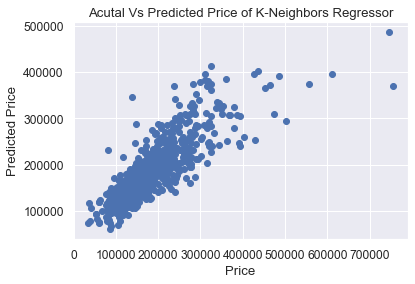

In [126]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,yknpred)
plt.xlabel('Price')
plt.ylabel('Predicted Price')
plt.title('Acutal Vs Predicted Price of K-Neighbors Regressor')
plt.show()

In [127]:
# Predicting test data with model:
y_test_kn_pred = kn.predict(x_test)

In [128]:
kn_accuracy = metrics.r2_score(y_test,y_test_kn_pred)
print("R Square Score of K-Neighbors Regressor:",kn_accuracy)

R Square Score of K-Neighbors Regressor: 0.6234102892234836


In [129]:
print ('mean absolute error of K-Neighbors Regressor is: ',mean_absolute_error(y_test,y_test_kn_pred))


mean absolute error of K-Neighbors Regressor is:  35488.043304843304


In [130]:
print ('mean squared error of K-Neighbors Regressor is: ',mean_squared_error(y_test,y_test_kn_pred))


mean squared error of K-Neighbors Regressor is:  2480967872.7990885


In [131]:
print ('Root mean squared error of K-Neighbors Regressor is: ',np.sqrt(mean_squared_error(y_test,y_test_kn_pred)))


Root mean squared error of K-Neighbors Regressor is:  49809.31512075917


2. XGB Regressor:

In [132]:
#Model Training
xg = XGBRegressor()
xg.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [133]:
#Prediction with trained data:
yxgpred = xg.predict(x_train)

In [134]:
print("R Square Score of svr:", metrics.r2_score(y_train,yxgpred))

R Square Score of svr: 0.9999775912775636


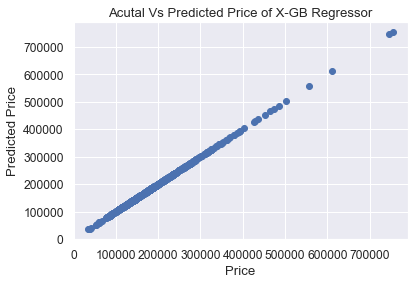

In [135]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,yxgpred)
plt.xlabel('Price')
plt.ylabel('Predicted Price')
plt.title('Acutal Vs Predicted Price of X-GB Regressor')
plt.show()

In [136]:
# Predicting test data with model:
y_test_xg_pred = xg.predict(x_test)

In [137]:
xg_accuracy = metrics.r2_score(y_test,y_test_xg_pred)
print("R Square Score of  X-GB Regressor:",xg_accuracy)

R Square Score of  X-GB Regressor: 0.8692323192972808


In [138]:
print ('mean absolute error of X-GB Regressor is: ',mean_absolute_error(y_test,y_test_xg_pred))


mean absolute error of X-GB Regressor is:  18337.499855324073


In [139]:
print ('mean squared error of X-GB Regressor is: ',mean_squared_error(y_test,y_test_xg_pred))


mean squared error of X-GB Regressor is:  861495695.0229205


In [140]:
print ('Root mean squared error of X-GB Regressor is: ',np.sqrt(mean_squared_error(y_test,y_test_xg_pred)))


Root mean squared error of X-GB Regressor is:  29351.246907464094


3.Adaboost Regressor:

In [141]:
#Model Training
abr = AdaBoostRegressor()
abr.fit(x_train,y_train)

AdaBoostRegressor()

In [142]:
#Prediction with trained data:
yabrpred = abr.predict(x_train)

In [143]:
print("R Square Score of AdaBoostRegressor:", metrics.r2_score(y_train,yabrpred))


R Square Score of AdaBoostRegressor: 0.8720687045228597


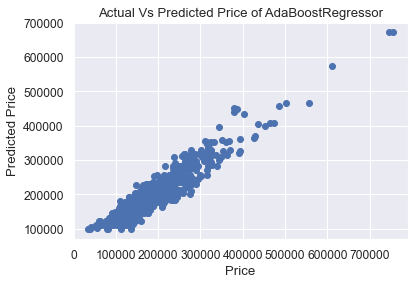

In [144]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,yabrpred)
plt.xlabel('Price')
plt.ylabel('Predicted Price')
plt.title('Actual Vs Predicted Price of AdaBoostRegressor')
plt.show()

In [145]:
# Predicting test data with model:
y_test_abr_pred = abr.predict(x_test)

In [146]:
abr_accuracy = metrics.r2_score(y_test,y_test_abr_pred)
print("R Square Score of AdaBoostRegressor:",abr_accuracy)

R Square Score of AdaBoostRegressor: 0.838484059732604


In [147]:
print ('mean absolute error of AdaBoostRegressor: ',mean_absolute_error(y_test,y_test_abr_pred))


mean absolute error of AdaBoostRegressor:  22987.68390048405


In [149]:
print ('mean squared error of AdaBoostRegressor: ',mean_squared_error(y_test,y_test_abr_pred))


mean squared error of AdaBoostRegressor:  1064064809.2112826


In [150]:
print ('Root mean squared error of AdaBoostRegressor: ',np.sqrt(mean_squared_error(y_test,y_test_abr_pred)))


Root mean squared error of AdaBoostRegressor:  32620.006272397964


4. Linear Regression:

In [151]:
#Model Training
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [152]:
#Prediction with trained data:
ylrpred = lr.predict(x_train)

In [153]:
print("R Square Score of Linear Regression:", metrics.r2_score(y_train,ylrpred))


R Square Score of Linear Regression: 0.82274874679601


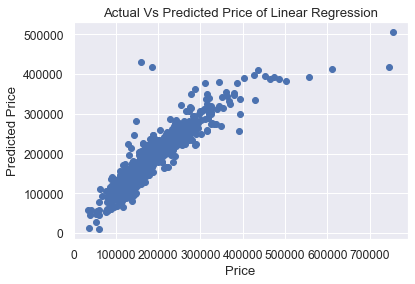

In [154]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,ylrpred)
plt.xlabel('Price')
plt.ylabel('Predicted Price')
plt.title('Actual Vs Predicted Price of Linear Regression')
plt.show()

In [155]:
# Predicting test data with model:
y_test_lr_pred = lr.predict(x_test)

In [156]:
lr_accuracy = metrics.r2_score(y_test,y_test_lr_pred)
print("R Square Score of Linear Regression:",lr_accuracy)

R Square Score of Linear Regression: 0.8232658467238116


In [157]:
print ('mean absolute error of Linear Regression: ',mean_absolute_error(y_test,y_test_lr_pred))


mean absolute error of Linear Regression:  23001.208583071028


In [158]:
print ('mean squared error of Linear Regression: ',mean_squared_error(y_test,y_test_lr_pred))


mean squared error of Linear Regression:  1164322188.730164


In [159]:
print ('Root mean squared error of Linear Regression: ',np.sqrt(mean_squared_error(y_test,y_test_lr_pred)))


Root mean squared error of Linear Regression:  34122.16565123269


5.Random Forrest Regressor:

In [160]:
#Model Training:
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [161]:
#Model Prediction with trained data:
y_rfr_pred = rfr.predict(x_train)

In [162]:
print("R Square Score of Random Forest Regressor:",metrics.r2_score(y_train,y_rfr_pred))


R Square Score of Random Forest Regressor: 0.9726380434147109


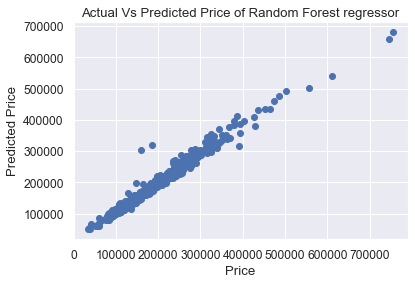

In [163]:
# Checking Actual Vs Predicted using Graph:
plt.scatter(y_train,y_rfr_pred)
plt.xlabel('Price')
plt.ylabel('Predicted Price')
plt.title('Actual Vs Predicted Price of Random Forest regressor')
plt.show()

In [164]:
# Predicting test data with model:
y_test_rfr_pred = rfr.predict(x_test)

In [165]:
rfr_accuracy = metrics.r2_score(y_test,y_test_rfr_pred)
print("R Square Score of Random Forest Regressor:",rfr_accuracy)

R Square Score of Random Forest Regressor: 0.9021638445359529


In [166]:
print ('mean absolute error of Random Forest Regressor: ',mean_absolute_error(y_test,y_test_rfr_pred))


mean absolute error of Random Forest Regressor:  16673.32547008547


In [167]:
print ('mean squared error of Random Forest Regressor is: ',mean_squared_error(y_test,y_test_rfr_pred))


mean squared error of Random Forest Regressor is:  644543256.3836633


In [168]:
print ('Root mean squared error of Random Forest Regressor is: ',np.sqrt(mean_squared_error(y_test,y_test_rfr_pred)))


Root mean squared error of Random Forest Regressor is:  25387.8564747728


Regularization:

In [169]:
#Regularization with Lasso
lasscv = LassoCV(alphas=None,max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [170]:
#best alpha parameter
alpha = lasscv.alpha_
alpha

42.88360018630982

In [171]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=42.88360018630982)

In [172]:
lasso_reg.score(x_test,y_test)

0.8260763864296585

In [173]:
# Regularization with Ridge
ridgecv = RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [174]:
ridge_alpha= ridgecv.alpha_
ridge_alpha

0.09099999999999998

In [175]:
ridge_model = Ridge(ridge_alpha)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.09099999999999998)

In [176]:
ridge_model.score(x_test,y_test)

0.823419597810028

CROSS VALIDATION SCORE:

In [177]:
#Cv of KNN Regression
kn_cv_score = cross_val_score(kn,x_train,y_train,cv=5,scoring='r2')
print(kn_cv_score)
print('mean :',kn_cv_score.mean())

[0.43864099 0.4593693  0.56675389 0.56903358 0.46080028]
mean : 0.4989196093258198


In [178]:
#CV of XGB Regressor
xg_cv_score = cross_val_score(xg,x_train,y_train,cv=5,scoring='r2')
print(xg_cv_score)
print('mean :',xg_cv_score.mean())

[0.82299955 0.81486801 0.61019465 0.88435546 0.8902964 ]
mean : 0.8045428142039365


In [179]:
#CV of Adaboost Regressor
abr_cv_score = cross_val_score(abr,x_train,y_train,cv=5,scoring='r2')
print(abr_cv_score)
print('mean :',abr_cv_score.mean())

[0.75695196 0.62303186 0.73514133 0.81965424 0.72104077]
mean : 0.7311640311127781


In [180]:
#CV of Linear Regression
lr_cv_score = cross_val_score(lr,x_train,y_train,cv=5,scoring='r2')
print(lr_cv_score)
print('mean :',lr_cv_score.mean())

[0.81831199 0.74742503 0.72252959 0.84411533 0.73797874]
mean : 0.7740721359097151


In [181]:
#CV of Random forrest regressor
rfr_cv_score = cross_val_score(rfr,x_train,y_train,cv=5,scoring='r2')
print(rfr_cv_score)
print('mean :',rfr_cv_score.mean())

[0.8453099  0.75134962 0.82911455 0.88926289 0.79189934]
mean : 0.8213872602027056


HYPER PARAMETER TUNING OF RANDOM FORREST REGRESSOR:

In [182]:
params ={'n_estimators':[100,200,300,400],
        'max_depth':[13,15,17,19],
        'min_samples_split':[3,4,5,6],
        'criterion':['mse','mae']}

In [183]:
gcv = GridSearchCV(RandomForestRegressor(), params, cv =5, n_jobs = -1)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [13, 15, 17, 19],
                         'min_samples_split': [3, 4, 5, 6],
                         'n_estimators': [100, 200, 300, 400]})

In [184]:
gcv.best_params_

{'criterion': 'mae',
 'max_depth': 19,
 'min_samples_split': 3,
 'n_estimators': 100}

In [185]:
fin = RandomForestRegressor(criterion = 'mse',max_depth = 13, min_samples_split = 4, n_estimators = 100)
fin.fit(x_train,y_train)
fin_pred = fin.predict(x_val)
fin_score = fin.score(x_val,y_val)
fin_score

0.9322178372833005

After Hyper parameter tuning of the train data model of Random Forrest Regressor we got the score of 92.83%.

In [186]:
fin_mae = mean_absolute_error(y_val,fin_pred)
print("The mean absolute error for the final model is ", fin_mae)

The mean absolute error for the final model is  10786.356394213839


Text(0, 0.5, 'Actual Score')

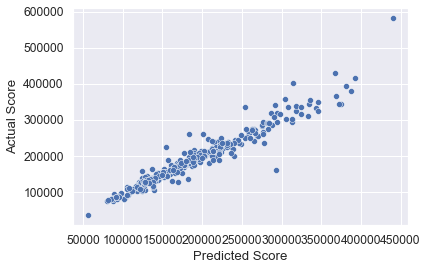

In [187]:
sns.scatterplot(x = fin_pred, y = y_val)
plt.xlabel('Predicted Score')
plt.ylabel('Actual Score')

In [188]:
# model prediction using Linear Regression
x_predict = list(rfr.predict(x_test))
rfr_house = {'predicted_values':x_predict,'orignal_values':y_test}
print(pd.DataFrame(rfr_house))

      predicted_values  orignal_values
802          173050.75          153500
748          133241.89          158000
560          174662.58          180000
1032         316799.81          440000
297          155202.69          160000
...                ...             ...
823          117684.00          120500
729          145832.00          148000
1133          84814.90           78000
918          143926.75          155000
276          146178.10          145000

[351 rows x 2 columns]


Now predict with the Test data into the model:

In [190]:
#READ THE DATASET
test_data=pd.read_csv('test.csv')
test_data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     337          20       RL         86.0    14157   Pave   NaN      IR1   
1    1018         120       RL          NaN     5814   Pave   NaN      IR1   
2     929          20       RL          NaN    11838   Pave   NaN      Reg   
3    1148          70       RL         75.0    12000   Pave   NaN      Reg   
4    1227          60       RL         86.0    14598   Pave   NaN      IR1   
..    ...         ...      ...          ...      ...    ...   ...      ...   
287    83          20       RL         78.0    10206   Pave   NaN      Reg   
288  1048          20       RL         57.0     9245   Pave   NaN      IR2   
289    17          20       RL          NaN    11241   Pave   NaN      IR1   
290   523          50       RM         50.0     5000   Pave   NaN      Reg   
291  1379         160       RM         21.0     1953   Pave   NaN      Reg   

    LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0           HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3           Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
..          ...       ...  ...         ...      ...    ...   ...         ...   
287         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
288         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
289         Lvl    AllPub  ...           0        0    NaN   NaN        Shed   
290         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
291         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

    MiscVal MoSold  YrSold  SaleType  SaleCondition  
0         0      7    2007        WD         Normal  
1         0      8    2009       COD        Abnorml  
2         0      6    2009        WD         Normal  
3         0      7    2009        WD         Normal  
4         0      1    2008        WD         Normal  
..      ...    ...     ...       ...            ...  
287       0     10    2008        WD         Normal  
288       0      2    2008        WD         Normal  
289     700      3    2010        WD         Normal  
290       0     10    2006        WD         Normal  
291       0      6    2006        WD         Normal  

[292 rows x 80 columns]

In [191]:
test_data.shape

(292, 80)

In [192]:
test_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [193]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

In [194]:
# Statistical summary:
test_data.describe().T

count          mean           std     min      25%     50%  \
Id             292.0    755.955479    442.565228     6.0   377.75   778.0   
MSSubClass     292.0     57.414384     43.780649    20.0    20.00    50.0   
LotFrontage    247.0     66.425101     21.726343    21.0    53.50    65.0   
LotArea        292.0  10645.143836  13330.669795  1526.0  7200.00  9200.0   
OverallQual    292.0      6.078767      1.356147     3.0     5.00     6.0   
OverallCond    292.0      5.493151      1.063267     3.0     5.00     5.0   
YearBuilt      292.0   1972.616438     30.447016  1872.0  1954.00  1976.0   
YearRemodAdd   292.0   1985.294521     20.105792  1950.0  1968.00  1994.0   
MasVnrArea     291.0    109.171821    175.030021     0.0     0.00     0.0   
BsmtFinSF1     292.0    439.294521    429.559675     0.0     0.00   369.5   
BsmtFinSF2     292.0     46.157534    152.467119     0.0     0.00     0.0   
BsmtUnfSF      292.0    557.315068    411.043768     0.0   255.00   487.0   
TotalBsmtSF    292.0   1042.767123    424.561153     0.0   771.75   971.0   
1stFlrSF       292.0   1133.691781    366.941919   372.0   858.00  1047.5   
2ndFlrSF       292.0    339.657534    424.278825     0.0     0.00     0.0   
LowQualFinSF   292.0      3.702055     38.219527     0.0     0.00     0.0   
GrLivArea      292.0   1477.051370    514.199429   520.0  1061.50  1440.0   
BsmtFullBath   292.0      0.424658      0.508831     0.0     0.00     0.0   
BsmtHalfBath   292.0      0.065068      0.247070     0.0     0.00     0.0   
FullBath       292.0      1.575342      0.547856     0.0     1.00     2.0   
HalfBath       292.0      0.359589      0.494795     0.0     0.00     0.0   
BedroomAbvGr   292.0      2.794521      0.807336     0.0     2.00     3.0   
KitchenAbvGr   292.0      1.051370      0.236160     1.0     1.00     1.0   
TotRmsAbvGrd   292.0      6.417808      1.728105     3.0     5.00     6.0   
Fireplaces     292.0      0.595890      0.621259     0.0     0.00     1.0   
GarageYrBlt    275.0   1979.760000     23.868875  1916.0  1964.00  1979.0   
GarageCars     292.0      1.729452      0.754430     0.0     1.00     2.0   
GarageArea     292.0    457.458904    210.785591     0.0   300.00   467.5   
WoodDeckSF     292.0     86.397260    121.898836     0.0     0.00     0.0   
OpenPorchSF    292.0     47.061644     65.865449     0.0     0.00    28.5   
EnclosedPorch  292.0     17.708904     51.892906     0.0     0.00     0.0   
3SsnPorch      292.0      2.489726     30.247488     0.0     0.00     0.0   
ScreenPorch    292.0     15.099315     58.483473     0.0     0.00     0.0   
PoolArea       292.0      0.000000      0.000000     0.0     0.00     0.0   
PoolQC           0.0           NaN           NaN     NaN      NaN     NaN   
MiscVal        292.0     28.184932    224.036218     0.0     0.00     0.0   
MoSold         292.0      6.232877      2.774556     1.0     4.00     6.0   
YrSold         292.0   2007.859589      1.322867  2006.0  2007.00  2008.0   

                    75%       max  
Id              1152.25    1456.0  
MSSubClass        70.00     190.0  
LotFrontage       79.00     150.0  
LotArea        11658.75  215245.0  
OverallQual        7.00      10.0  
OverallCond        6.00       9.0  
YearBuilt       2001.00    2009.0  
YearRemodAdd    2003.25    2010.0  
MasVnrArea       180.00    1031.0  
BsmtFinSF1       700.50    1767.0  
BsmtFinSF2         0.00    1085.0  
BsmtUnfSF        780.00    1935.0  
TotalBsmtSF     1322.00    3094.0  
1stFlrSF        1370.50    2402.0  
2ndFlrSF         717.00    1589.0  
LowQualFinSF       0.00     479.0  
GrLivArea       1720.25    3447.0  
BsmtFullBath       1.00       2.0  
BsmtHalfBath       0.00       1.0  
FullBath           2.00       3.0  
HalfBath           1.00       2.0  
BedroomAbvGr       3.00       6.0  
KitchenAbvGr       1.00       3.0  
TotRmsAbvGrd       7.00      12.0  
Fireplaces         1.00       2.0  
GarageYrBlt     2003.00    2010.0  
GarageCars         2.00       4.0  
Gar

In [195]:
test_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage       45
LotArea            0
Street             0
Alley            278
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         1
MasVnrArea         1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           7
BsmtCond           7
BsmtExposure       7
BsmtFinType1       7
BsmtFinSF1         0
BsmtFinType2       7
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

I can see that the basic Random Forest Model is performing little better than the Hyper tuned model in terms of the mean absolute error.

Predicting the values using the trained model for the test dataset. Further, we are using the same pre-processing steps as before.

In [196]:
test_data = test_data.drop(columns = ['MiscVal','PoolArea','ScreenPorch','3SsnPorch','EnclosedPorch','BsmtFinSF2',
                                      'Exterior2nd','Alley','MiscFeature','PoolQC','Id','YrSold'])
test_data['LotFrontage']=test_data['LotFrontage'].fillna(test_data['LotFrontage'].mean())
test_data['MasVnrType'] = test_data['MasVnrType'].fillna(test_data['MasVnrType'].mode()[0])
test_data['MasVnrArea'] = test_data['MasVnrArea'].fillna(0)
test_data['BsmtQual'] = test_data['BsmtQual'].fillna('NA')
test_data['BsmtCond'] = test_data['BsmtCond'].fillna('NA')
test_data['BsmtExposure'] = test_data['BsmtExposure'].fillna('NA')
test_data['BsmtFinType1'] = test_data['BsmtFinType1'].fillna('NA')
test_data['BsmtFinType2'] = test_data['BsmtFinType2'].fillna('NA')
test_data['FireplaceQu'] = test_data['FireplaceQu'].fillna('NA')
test_data['GarageType'] = test_data['GarageType'].fillna('NA')
test_data['GarageYrBlt'] = test_data['GarageYrBlt'].fillna(0)
test_data['GarageFinish'] = test_data['GarageFinish'].fillna('NA')
test_data['GarageQual'] = test_data['GarageQual'].fillna('NA')
test_data['GarageCond'] = test_data['GarageCond'].fillna('NA')
test_data['Fence'] = test_data['Fence'].fillna('NA')

In [197]:
test_data['Electrical'] = test_data['Electrical'].fillna(test_data['Electrical'].mode()[0])


In [198]:
test_data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces  

In [199]:
encoder = OrdinalEncoder()
for i in test_data.columns:
    if test_data[i].dtypes == 'object':
        test_data[i] = encoder.fit_transform(test_data[i].values.reshape(-1,1))


In [200]:
z = np.abs(zscore(test_data[['LotFrontage','LotArea','MasVnrArea','GarageArea','OpenPorchSF']]))
z

LotFrontage   LotArea  MasVnrArea  GarageArea  OpenPorchSF
0       0.981605  0.263894    0.522510    1.038573     0.059897
1       0.000000  0.363030    0.623319    0.511068     0.715738
2       0.000000  0.089636    0.623319    0.306719     1.580750
3       0.429998  0.101809    0.623319    1.061944     0.715738
4       0.981605  0.297033    0.199362    1.000555     0.441985
..           ...       ...         ...         ...          ...
287     0.580436  0.032999    2.057920    1.428262     0.789906
288     0.472632  0.105212    0.623319    1.019564     0.715738
289     0.000000  0.044775    0.407927    0.107122     0.715738
290     0.823655  0.424197    0.623319    0.178016     0.350734
291     2.277892  0.653160    1.714172    0.919375     0.715738

[292 rows x 5 columns]

In [201]:
test_new = test_data[(z<3).all(axis = 1)]
print(test_data.shape)
print(test_new.shape)

(292, 68)
(275, 68)


In [202]:
X_test=test_data

In [203]:
# Doing the prediction using the test dataset
rfr.fit(x_train, y_train)
rfr_pred = rfr.predict(X_test)
score=rfr.score(x_train,y_train)
print(score,rfr,':')

0.9744450661600548 RandomForestRegressor() :


In [204]:
#model(test dataset) prediction using gbr
x_predict = list(rfr.predict(X_test))
df_new = {'predicted_values':x_predict[0:250],'orignal_values':y_test[0:250]}
print(pd.DataFrame(df_new))

      predicted_values  orignal_values
802          425951.67          153500
748          376601.54          158000
560          314597.61          180000
1032         274715.98          440000
297          237471.70          160000
...                ...             ...
489          373915.93          132250
789          278059.48          197000
892          298451.78          194000
1028         180144.60          177500
219          192516.78          171500

[250 rows x 2 columns]


In [205]:
#importing joblib
import joblib

joblib.dump(rfr,'rfr_house_pred.obj')

# SAVING THE MODEL

['rfr_house_pred.obj']

In [206]:
rfr_from_joblib=joblib.load('rfr_house_pred.obj')
rfr_from_joblib.predict(X_test)

#TESTING THE SAVED MODEL

array([425951.67, 376601.54, 314597.61, 274715.98, 237471.7 , 185267.47,
       220976.68, 385676.23, 294910.92, 234936.13, 162323.14, 193470.52,
       170926.77, 194611.77, 356504.37, 177233.85, 186596.96, 172109.64,
       289978.75, 296216.9 , 280556.24, 209441.79, 182225.05, 156082.22,
       175408.5 , 182205.5 , 218960.33, 193850.96, 226779.81, 160294.07,
       189254.98, 283618.62, 292058.28, 211731.02, 172853.57, 280531.53,
       227339.91, 188395.87, 231387.27, 230146.55, 169017.  , 511470.65,
       286596.13, 283218.21, 188796.22, 206879.77, 170966.8 , 162211.1 ,
       293706.21, 366860.9 , 188389.62, 216906.81, 160220.04, 157390.34,
       293929.9 , 185450.35, 192720.62, 280888.2 , 177025.16, 348564.58,
       183589.51, 216040.92, 181091.02, 236931.26, 289811.43, 178267.95,
       187279.14, 284066.49, 188346.28, 197020.66, 506013.44, 216118.89,
       221605.71, 175921.98, 207858.51, 302793.31, 523545.86, 356330.07,
       365659.9 , 181075.8 , 476233.53, 180794.  , 